<a href="https://colab.research.google.com/github/efsasezer/Machine-Learning/blob/main/Makine_%C3%96%C4%9Frenmesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas kütüphanesini yükleme
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving makineveriseti(yeni).xlsx to makineveriseti(yeni) (1).xlsx




**Veri Setini Yükleme**

In [ ]:
# Excel dosyasını okuma
veri = pd.read_excel('makineveriseti(yeni).xlsx')
# Veriyi CSV dosyasına dönüştürme
veri.to_csv('veri.csv', index=False)  # index=False belirtilerek indeks sütunu kaydedilmez
veri = pd.read_csv('veri.csv', sep='\s+', header=None)
columnHeads = ["pregnant", "glucose", "blood","skinfold","serum","bki","Diabetes","age","diabet"]
veri.columns = columnHeads
veri.to_csv('veri.csv', index=False)
veri.head(10)

,pregnant,glucose,blood,skinfold,serum,bki,Diabetes,age,diabet
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


 Normalde veri setimin 8 öznitelik ve 1 sonuç için  9 sütun 768 satırdan oluşması gerekiyordu. Ama ilk izlenimde gördüğümde  tek bir sütundan oluştuğunu fark ettim. Bu yüzden öncelikle xlsx dosyamı csv dosyasına dönüştürerek her boşlukta sütunlara ayrılmasını sağlatıp 9 sütuna ayırmış oldum. Başlıkları da header=None parametresini kullanarak sutunların başlıklarını kendim belirledim.Sonra ise veri.csv dosyamın yeni veri setimin kaydetmesini sağladım. veri değişkenine atadığım data setimi veri.head() diyerek ilk 10 satırını gösterdim.

In [ ]:
# CSV dosyasını okuma ve sütunları boşluklarla ayırma
df = pd.read_csv('veri.csv')

# Veri çerçevesini görüntüleme
print(df)

     pregnant  glucose  blood  skinfold  serum   bki  Diabetes  age  diabet
0           6      148     72        35      0  33.6     0.627   50       1
1           1       85     66        29      0  26.6     0.351   31       0
2           8      183     64         0      0  23.3     0.672   32       1
3           1       89     66        23     94  28.1     0.167   21       0
4           0      137     40        35    168  43.1     2.288   33       1
..        ...      ...    ...       ...    ...   ...       ...  ...     ...
763        10      101     76        48    180  32.9     0.171   63       0
764         2      122     70        27      0  36.8     0.340   27       0
765         5      121     72        23    112  26.2     0.245   30       0
766         1      126     60         0      0  30.1     0.349   47       1
767         1       93     70        31      0  30.4     0.315   23       0

[768 rows x 9 columns]


Pima Indians Diabetes Dataset, 768 gözlem içeren bir veri setidir ve Pima Kızılderilileri üzerinde yapılan çalışmaların sonuçlarını kullanarak diyabet başlangıcını tahmin etmeyi amaçlar. Sekiz girdi değişkeni ve bir çıktı değişkeni içerir; eksik değerlerin sıfır değerleriyle kodlandığı düşünülmektedir.

In [ ]:
# Diyabet hastası olanların sayısını bulma
diyabet_hastasi_sayisi = df[df['diabet'] == 1].shape[0]

print("Diyabet hastası olanların sayısı:", diyabet_hastasi_sayisi)

# Diyabet hastası olanların sayısını bulma
diyabet_hastasi_sayisi = df[df['diabet'] == 0].shape[0]

print("Diyabet hastası olmayanların sayısı:", diyabet_hastasi_sayisi)



Diyabet hastası olanların sayısı: 268
Diyabet hastası olmayanların sayısı: 500


768 tane verimin içerisinden 268 kişinin diyabet hastası olduğunu 500 kişinin hasta olmadığını görmüş oldum.

In [ ]:
df.isna().sum()
# Datamız`da bmi sütununda 0 tane null veri var.

pregnant    0
glucose     0
blood       0
skinfold    0
serum       0
bki         0
Diabetes    0
age         0
diabet      0
dtype: int64

null değerlerini bulup yok etmek istediğimde null değeri olmadığını gördüm.Fakat eksik değerlerin sıfır değerleri ile kodlandığı düşünülmektedir. Bu yüzden 0 değerlerinin ortadan kalkması için en sık tekrarlanan değerle doldurma işlemi uygulayacağım. Veri setini **null_df** değişkenine atayıp ilerde uygulayacağım algoritmalarda karşılaştırma yapmama olanak sağlayacak.Dikkat ettiğim diğer şey ise diabet sütunumda yani verinin diabet hastası olup olmadığı belirttiğim sütunumda da 0 değeri var ama bu sütundaki 0 değerlerinin değişmemesi gerekmektedir.Çünkü buradaki 0 değişkeni kayıp veri değil hastalığa sahip olmadığını gösterir.

In [ ]:
import numpy as np

null_df = df.copy()
# Diğer sütunlardaki 0 değerlerini NaN (eksik değer) olarak işaretle
null_df.iloc[:, :-1] = df.iloc[:, :-1].replace(0, np.nan)

# Eksik değerleri en sık tekrarlanan değerle doldur
null_df.fillna(df.mode().iloc[0], inplace=True)

# Diyabet sütunundaki 0 değerlerini tekrar 0 olarak ayarla
null_df['diabet'].replace(np.nan, 0, inplace=True)

# Yeni veri çerçevesini görüntüleme
print(null_df)


     pregnant  glucose  blood  skinfold  serum   bki  Diabetes  age  diabet
0         6.0    148.0   72.0      35.0    0.0  33.6     0.627   50       1
1         1.0     85.0   66.0      29.0    0.0  26.6     0.351   31       0
2         8.0    183.0   64.0       0.0    0.0  23.3     0.672   32       1
3         1.0     89.0   66.0      23.0   94.0  28.1     0.167   21       0
4         1.0    137.0   40.0      35.0  168.0  43.1     2.288   33       1
..        ...      ...    ...       ...    ...   ...       ...  ...     ...
763      10.0    101.0   76.0      48.0  180.0  32.9     0.171   63       0
764       2.0    122.0   70.0      27.0    0.0  36.8     0.340   27       0
765       5.0    121.0   72.0      23.0  112.0  26.2     0.245   30       0
766       1.0    126.0   60.0       0.0    0.0  30.1     0.349   47       1
767       1.0     93.0   70.0      31.0    0.0  30.4     0.315   23       0

[768 rows x 9 columns]


In [ ]:
df.duplicated().sum()

0

Dublicated kodunun 0 çıkması, veri setindeki tam olarak aynı olan tekrar eden satırların olmadığını gösterir. Yani, hiçbir satır tamamen aynı değil ve veri setimde tekrar eden veri yoktur. Bu durum, her bir satırın benzersiz olduğu anlamına gelir.

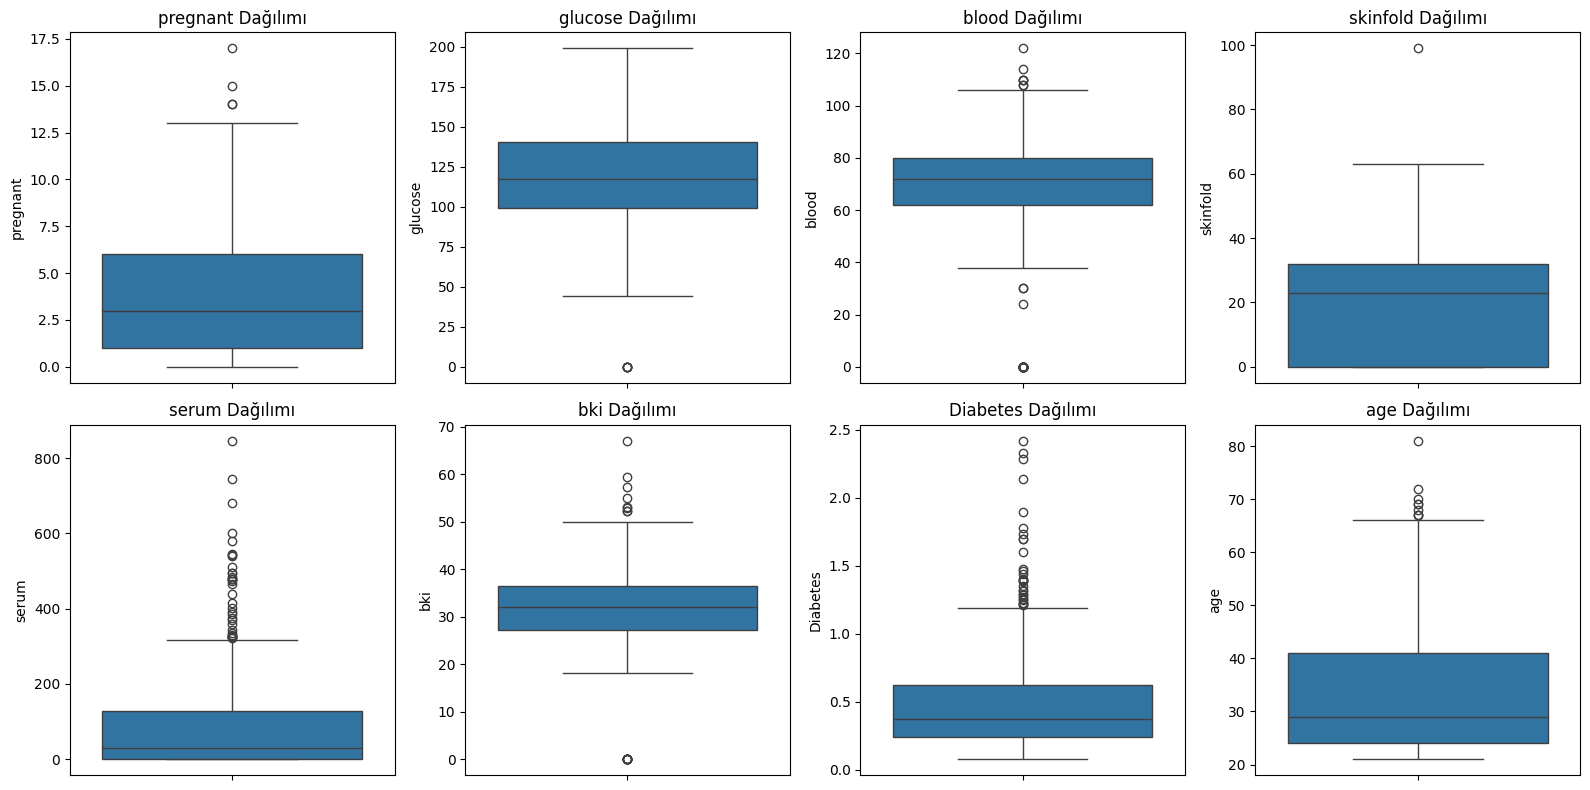

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_distribution(df, features):
    num_plots = len(features)
    num_rows = (num_plots + 3) // 4  # Her satırda 4 grafik olacak şekilde hesapla

    fig, axes = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.boxplot(data=df, y=feature, ax=axes[i])
        axes[i].set_title(f'{feature} Dağılımı')
        axes[i].set_ylabel(feature)
        axes[i].set_xlabel(None)  # x ekseni etiketini kaldır

    # Boş grafikleri gizle
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Özniteliklerin listesi
features = ['pregnant', 'glucose', 'blood', 'skinfold', 'serum', 'bki', 'Diabetes', 'age']

# Her öznitelik için görselleştirme yapma
plot_feature_distribution(df, features)



Veri setinin görselleştirmesini sağlamak için boxplot kutu grafiği modelini kullandım. 2 saatlik serum insülini (mu U/ml) , diyabet soyağacı işlevinin uygulandığı özniteliklerin aykırı değerlerinin fazla olduğunu , glikoz ve Triceps deri kıvrım kalınlığı (mm) sütunlarının aykırı değerlerinin az olduğu gözlemledim.Boxplot grafiğinde çok sayıda aykırı değer varsa, bu genellikle veri setinin dağılımının daha değişken olduğunu ve belirli bir merkezi eğilimin etrafında daha geniş bir yayılım olduğunu gösterir. Ayrıca Bki değerinin olduğu sütunda boxplot daha dar olduğu için daha homojen olduğunu gösterirken, age gibi geniş bir boxplot daha fazla değişkenlik ve heterojenlik olduğunu gösterir.

**Normalizasyon İşlemi**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min-max normalizasyonu
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

# Normalizasyon sonrası veri seti
normalizedDf = pd.DataFrame(normalized_data, columns=df.columns)


Normalizasyon, veri setindeki özellikleri belirli bir aralığa dönüştürme işlemidir.Veri setini normalleştirmek için Min-Max normalizasyonu yöntemini kullanacağım. Bu yöntem, her bir özniteliğin değerlerini 0 ile 1 arasında ölçeklendirir.Burada yaptığım normalizasyon işlemi algoritmaları uygularken kullanacağım.Yani tüm modeller normalizasyon işlemi sonrasında uygulamış olacağım.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# "diabet" sütununu çıkararak yeni bir veri çerçevesi oluşturma
df_without_target = df.drop(columns=['diabet'], errors='ignore')

# Min-max normalizasyonu
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(df_without_target)

# PCA ve LDA için bileşen sayısını belirleme
n_components_pca = 2  # İki öz değer için boyut indirgeme
n_components_lda = min(len(df['diabet'].unique()) - 1, normalized_df.shape[1])  # Sınıf sayısından bir eksik

# PCA ve LDA modeli oluşturma
pca = PCA(n_components=n_components_pca)
lda = LDA(n_components=n_components_lda)

# Veri setine PCA ve LDA uygulanması
pca_transformed_data = pca.fit_transform(normalized_df)
lda_transformed_data = lda.fit_transform(normalized_df, df['diabet'] if 'diabet' in df.columns else None)

# PCA ve LDA için en ayırt edici özniteliklerin belirlenmesi
pca_explained_variance = pca.explained_variance_ratio_
lda_explained_variance = lda.explained_variance_ratio_

print("PCA için öz değerler:", pca_explained_variance)
print("LDA için öz değerler:", lda_explained_variance)


PCA için öz değerler: [0.31192249 0.21186663]
LDA için öz değerler: [1.]


Öncelikli olarak ayırt edici öznitelikleri belirlemek için hedef sütunumu yani hastalığa sahip olup olmadığını belirlediğim diabet sütununu çıkararak tekrar normalizasyon işlemi uyguladım ve bunun üzerinden pca lda algoritmalarını uyguladım.
Bu öz değerler, her bir yöntemin elde ettiği bileşenlerin toplam varyanstaki oranını gösterir. Örneğin, PCA için ilk bileşenin toplam varyansta %31.19'luk bir orana sahip olduğunu ve ikinci bileşenin %21.19'luk bir orana sahip olduğunu gördüm. LDA için ise tek bir bileşenin tüm varyansı açıkladığını gösteren 1.0 bir öz değer elde ettim.

In [ ]:
# PCA bileşenlerinin ağırlıklarını alma
pca_components = pca.components_

# LDA bileşenlerinin ağırlıklarını alma
lda_components = lda.coef_


In [ ]:
print("PCA'nın bileşenlerin ağırlıkları:", pca_components)
print("LDA bileşenlerinin ağırlıkları:", lda_components)


PCA'nın bileşenlerin ağırlıkları: [[ 0.65204425  0.24136132  0.22516492 -0.0559239  -0.00386329  0.0520263
   0.01915023  0.67798812]
 [-0.16932416  0.35676608  0.33104032  0.59815466  0.44736849  0.31942511
   0.26749398 -0.05428262]]
LDA bileşenlerinin ağırlıkları: [[ 2.20574287  7.42343568 -1.79256943  0.09638944 -0.96236705  5.59954666
   2.17277766  0.99104565]]


PCA (Principal Component Analysis) ve LDA (Linear Discriminant Analysis), boyut azaltma ve veri sınıflandırma amacıyla kullanılan iki farklı yöntemdir. PCA, veri setindeki varyansı maksimize eden bileşenleri bulurken, LDA sınıflar arasındaki ayrımı maksimize etmeye odaklanır.Bu yüzden veri setindeki özniteliklerin ayırt ediciliğini belirlemek için PCA ve LDA'nın öznitelik ağırlıklarına baktım.

PCA'da ilk bileşenler genellikle veri setindeki en yüksek varyansı açıklayan öznitelikler olduğunu fark ettim ve bulduğum ağırlıkları kullanarak, hangi özniteliklerin en ayırt edici olduğunu belirledim. Ağırlıkların mutlak değerleri, özniteliklerin önemini gösterir. Daha yüksek mutlak değere sahip ağırlıklar, daha ayırt edici özniteliklere işaret ettiğini bilerek aşağıdaki sonuçları çıkarttım :
1.   Birinci bileşen için en yüksek ağırlıklar 0.652 ve 0.678 değerlerine sahiptir. Bu öznitelikler, birinci bileşende en büyük varyansın olduğu ve dolayısıyla veri setinde en büyük değişikliği yaratan özniteliklerdir. Özellikle 0.652 ve 0.678 değerlerine sahip olan öznitelikler, birinci bileşenin oluşumunda belirleyici rol oynar.
PCA'da ilk bileşende (birincil bileşen) pregnant ve age özniteliklerinin belirleyici rol oynadığı gördüm. Bu, bu özniteliklerin genel veri setindeki değişkenliği veya deseni önemli ölçüde açıkladığı anlamına gelir.
2.   İkinci bileşenin ağırlıklarına bakıldığında, özellikle dördüncü özniteliğin (0.59815466) ve beşinci özniteliğin (0.44736849) önemli olduğu gördüm.Yani deri kıvrım kalınlığı ve serum insülini değerlerinin ayırt edici öznitelik olduğunu gördüm.
3. LDA'da en ayırt edici özniteliklerin "glucose" ve "bki" olduğunu
söyleyebilirim. Bu öznitelikler, LDA'nın bileşenlerinde daha yüksek ağırlıklara sahiptir, yani sınıflar arasındaki ayrımı en iyi sağlarlar.


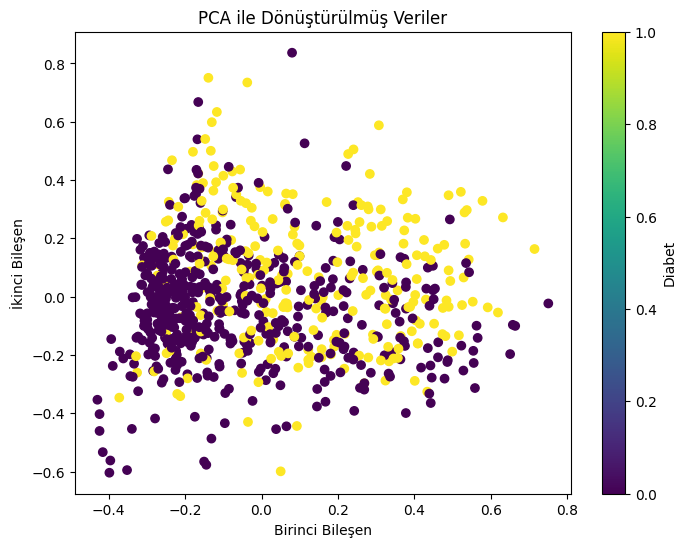

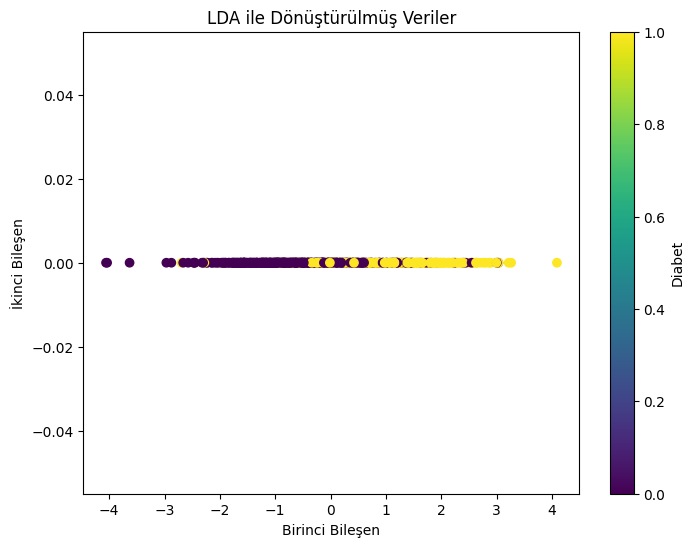

In [ ]:
import matplotlib.pyplot as plt

# PCA dönüştürülmüş verilerin görselleştirilmesi
plt.figure(figsize=(8,6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], c=df['diabet'], cmap='viridis')
plt.title('PCA ile Dönüştürülmüş Veriler')
plt.xlabel('Birinci Bileşen')
plt.ylabel('İkinci Bileşen')
plt.colorbar(label='Diabet')
plt.show()

# LDA dönüştürülmüş verilerin görselleştirilmesi
plt.figure(figsize=(8, 6))
plt.scatter(lda_transformed_data[:, 0], np.zeros_like(lda_transformed_data[:, 0]), c=df['diabet'], cmap='viridis')
plt.title('LDA ile Dönüştürülmüş Veriler')
plt.xlabel('Birinci Bileşen')
plt.ylabel('İkinci Bileşen')
plt.colorbar(label='Diabet')
plt.show()

**PCA ile Dönüştürülmüş Veriler:**

Sarı noktalar, hastalığı temsil ederken (1), mor noktalar hastalık olmamasını (0) temsil ediyor.
Mor noktaların genellikle birinci bileşen için -0.2 ile 0 arasında toplandığı gözlemledim.
Sarı noktalar ise biraz daha geniş bir alana yayılmış durumda, özellikle 0.0 ve daha büyük değerlerde daha yoğun bir şekilde bulunuyor.
Bu durum, PCA'nın hastalık ve sağlık durumunu birincil bileşen üzerinde ayırmada başarılı olduğunu gösteriyor.Grafikten önceki kodlarda da PCA'da birinci bileşen genellikle en fazla değişkenliği (varyansı) açıklayan bileşen olduğunu görmüştüm. Mor noktaların daha dar bir aralıkta toplanması, sağlıklı bireylerin benzer özelliklere sahip olduğunu ve bu nedenle daha küçük bir varyansla temsil edildiğini işaret ediyor. Sarı noktaların daha geniş bir alana yayılması, hastalıklı bireyler arasında daha büyük bir çeşitlilik olduğunu ve bu nedenle daha geniş bir varyansla temsil edildiklerini gösteriyor.

**LDA ile Dönüştürülmüş Veriler:**

Dönüştürülmüş verilerin grafiksel temsili düz bir yatay çizgi şeklinde.
Bu çizginin sol tarafındaki mor renk, hastalığı temsil ederken; sağ tarafındaki sarı renk, hastalık olmamasını temsil ediyor.
Mor ve sarı renkler net bir şekilde ayrılmış durumda.
Bu durum, LDA'nın hastalık ve sağlık durumunu net bir şekilde ayırt ettiğini gösteriyor. Düz yatay çizgi, veri setindeki sınıflar arasındaki ayrımı en iyi şekilde ifade eder. Mor ve sarı renklerin net bir şekilde ayrılması, LDA'nın veri setindeki sınıfları doğru bir şekilde ayırt ettiğini gösterdi.



**İlk olarak, ana veri seti üzerinde regresyon analizlerini uyguladım:**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Veri setini bağımlı değişken ve bağımsız değişkenler olarak ayırma
X = df.drop(columns=['diabet'], errors='ignore')
y = df['diabet']

# Verileri normalleştirme
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Veri setini eğitim ve test setlerine böleme
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Çoklu Doğrusal Regresyon modeli oluşturma ve eğitme
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_coefficients = linear_regression.coef_
print("Çoklu Doğrusal Regresyon Katsayıları (Ana Veri Seti):", linear_coefficients)

# Multinominal Lojistik Regresyon modeli oluşturma ve eğitme
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
logistic_coefficients = logistic_regression.coef_
print("Multinominal Lojistik Regresyon Katsayıları (Ana Veri Seti):", logistic_coefficients)

# Test seti üzerinde tahminler yapma
linear_predictions = linear_regression.predict(X_test)
logistic_predictions = logistic_regression.predict(X_test)

# Çoklu Doğrusal Regresyon performansı
linear_accuracy = linear_regression.score(X_test, y_test)
print("Çoklu Doğrusal Regresyon Doğruluk (Ana Veri Seti):", linear_accuracy)

# Multinominal Lojistik Regresyon performansı
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Multinominal Lojistik Regresyon Doğruluk (Ana Veri Seti):", logistic_accuracy)

# Çoklu Doğrusal Regresyon performans metrikleri
print("\nÇoklu Doğrusal Regresyon Performans Metrikleri:")
print("R-Kare (Coefficient of Determination):", linear_regression.score(X_test, y_test))

# Multinominal Lojistik Regresyon performans metrikleri
print("Multinominal Lojistik Regresyon Performans Metrikleri (Ana Veri Seti):")
print(classification_report(y_test, logistic_predictions))


Çoklu Doğrusal Regresyon Katsayıları (Ana Veri Seti): [ 0.03028606  0.18345471 -0.03309902 -0.0040366  -0.01456877  0.12743121
  0.02413868  0.07362405]
Multinominal Lojistik Regresyon Katsayıları (Ana Veri Seti): [[ 0.19424111  1.12126806 -0.19874764 -0.02460523 -0.10496358  0.83808241
   0.1392478   0.41619487]]
Çoklu Doğrusal Regresyon Doğruluk (Ana Veri Seti): 0.22240764966110582
Multinominal Lojistik Regresyon Doğruluk (Ana Veri Seti): 0.7359307359307359

Çoklu Doğrusal Regresyon Performans Metrikleri:
R-Kare (Coefficient of Determination): 0.22240764966110582
Multinominal Lojistik Regresyon Performans Metrikleri (Ana Veri Seti):
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



**Ana veri seti için model karşılaştırılması**

Doğruluk:

ÇDR modeli oldukça düşük bir doğruluk (%22.24) elde etmektedir. Bu, modelin veri setindeki ilişkiyi iyi yakalayamadığını gösterdi.
MLR modeli oldukça yüksek bir doğruluk (%73.59) elde etmektedir. Bu, modelin veri setindeki ilişkiyi iyi yakaladığını ve doğru tahminler yapabildiğini gösterdi.
Multinominal Lojistik Regresyon modeli, Çoklu Doğrusal Regresyon modeline kıyasla çok daha yüksek bir doğruluk değerine sahip olduğunu gözlemledim. (0.735 vs. 0.222).
Multinominal Lojistik Regresyon modeli,Multinominal Lojistik Regresyon modeli, hedef değişkenlerin (0 ve 1) her ikisi için de daha yüksek hassasiyet(precision) ve duyarlılık (recall) değerlerine sahip. Bu, modelin sınıfları daha dengeli bir şekilde tahmin ettiğini gösterdi.
Her iki modelin F1-score değerleri sınıf başına eşittir, her iki sınıf için de modelin genel performansının iyi olduğunu göstermekte.

 Multinominal Lojistik Regresyon modeli daha dengeli sonuçlar sağladığını gördüm.Çünkü MLR modeli, ÇDR modeline göre çok daha yüksek bir doğruluk ve performans elde etmekte.
Çoklu Doğrusal Regresyon modeli, sınıflandırma performansı açısından zayıf bir performans sergilerken, Multinominal Lojistik Regresyon modeli daha başarılıdır.Böylelikle MLR modelinin bu veri seti için daha uygun bir model olduğunu görmüş oldum.

**PCA uygulanmış transformasyon öznitelik matrisi üzerinde regresyon analizlerini uygulayalım:**

In [ ]:
# Veri setini PCA dönüştürülmüş öznitelik matrisi ve hedef değişken olarak ayırma
X_pca = pca_transformed_data
y_pca = df['diabet']

# Veri setini eğitim ve test setlerine böleme
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size=0.3, random_state=42)

# Çoklu Doğrusal Regresyon modeli oluşturma ve eğitme
linear_regression_pca = LinearRegression()
linear_regression_pca.fit(X_pca_train, y_pca_train)
linear_coefficients_pca = linear_regression_pca.coef_
print("Çoklu Doğrusal Regresyon Katsayıları (PCA Uygulanmış Veri Seti):", linear_coefficients_pca)

# Multinominal Lojistik Regresyon modeli oluşturma ve eğitme
logistic_regression_pca = LogisticRegression()
logistic_regression_pca.fit(X_pca_train, y_pca_train)
logistic_coefficients_pca = logistic_regression_pca.coef_
print("Multinominal Lojistik Regresyon Katsayıları (PCA Uygulanmış Veri Seti):", logistic_coefficients_pca)

# Test seti üzerinde tahminler yapma
linear_predictions_pca = linear_regression_pca.predict(X_pca_test)
logistic_predictions_pca = logistic_regression_pca.predict(X_pca_test)

# Çoklu Doğrusal Regresyon performansı
linear_accuracy_pca = linear_regression_pca.score(X_pca_test, y_pca_test)
print("Çoklu Doğrusal Regresyon Doğruluk (PCA Uygulanmış Veri Seti):", linear_accuracy_pca)

# Multinominal Lojistik Regresyon performansı
logistic_accuracy_pca = accuracy_score(y_pca_test, logistic_predictions_pca)
print("Multinominal Lojistik Regresyon Doğruluk (PCA Uygulanmış Veri Seti):", logistic_accuracy_pca)

# Çoklu Doğrusal Regresyon performans metrikleri
print("\nÇoklu Doğrusal Regresyon Performans Metrikleri:")
print("R-Kare (Coefficient of Determination):", linear_regression.score(X_test, y_test))


# Multinominal Lojistik Regresyon performans metrikleri
print("Multinominal Lojistik Regresyon Performans Metrikleri (PCA Uygulanmış Veri Seti):")
print(classification_report(y_pca_test, logistic_predictions_pca))


Çoklu Doğrusal Regresyon Katsayıları (PCA Uygulanmış Veri Seti): [0.6552117  0.65265004]
Multinominal Lojistik Regresyon Katsayıları (PCA Uygulanmış Veri Seti): [[2.7690746  2.69578092]]
Çoklu Doğrusal Regresyon Doğruluk (PCA Uygulanmış Veri Seti): 0.1052961256545254
Multinominal Lojistik Regresyon Doğruluk (PCA Uygulanmış Veri Seti): 0.70995670995671

Çoklu Doğrusal Regresyon Performans Metrikleri:
R-Kare (Coefficient of Determination): 0.22240764966110582
Multinominal Lojistik Regresyon Performans Metrikleri (PCA Uygulanmış Veri Seti):
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       151
           1       0.62      0.42      0.50        80

    accuracy                           0.71       231
   macro avg       0.68      0.64      0.65       231
weighted avg       0.70      0.71      0.69       231



**PCA Veri Seti İçin Model Karşılaştırılması**

Doğruluk:

Çoklu Doğrusal Regresyon modelinin doğruluğu oldukça düşüktür (%10.53).
Multinominal Lojistik Regresyon modelinin doğruluğu oldukça yüksektir (%71).

Multinominal Lojistik Regresyon Performans Metrikleri:

Precision: Modelin doğru tahmin ettiği 0 sınıfı örneklerinin oranı.
Recall: Modelin doğru tahmin ettiği 1 sınıfı örneklerinin oranı.
F1 puanı: Kesicilik ve duyarlılığın bir araya getirilmiş ölçüsü.
Support: Her bir sınıftaki örneklerin sayısı.

Sonuç:

Multinominal Lojistik Regresyon modeli, Çoklu Doğrusal Regresyon modeline göre çok daha yüksek bir doğruluk elde ettiğini gördüm.
Multinominal Lojistik Regresyon performans metrikleri de modelin her iki sınıfı da iyi tahmin ettiğini göstermektedir.Her iki hedef değişken (0 ve 1) için de daha dengeli bir performans sunmaktadır.
 Hassasiyet, duyarlılık ve F1-score değerleri incelediğimde, sınıf dengesizliği nedeniyle daha az veriye sahip olan ve diyabet sonucunun 1 olduğu yani diyabet hastası sınıfların performansında azalma olduğunu gördüm.Bu yüzden model diyabet hastası olan verilerin doğru bir şekilde sınıflandırmakta daha düşük başarı gösteriyor olduğunu gördüm.
 Çoklu Doğrusal Regresyon modelinde sınıflandırma metriklerinde düşük performans sergilemektedir ve modelin PCA uygulanmış veri seti üzerinde başarısız olduğu görülüyor.

**Ana veri seti ile PCA uygulanmış veri seti karşılaştırılması**


*  Ana veri seti üzerindeki doğrusal regresyon ve multinominal lojistik regresyon modelleri, PCA uygulanmış veri seti üzerindeki modellere kıyasla daha yüksek doğruluk değerlerine sahiptir.
*  Ana veri setindeki multinominal lojistik regresyon modeli, PCA uygulanmış veri setindeki modele kıyasla daha yüksek hassasiyet, duyarlılık ve f1-score değerlerine sahiptir.
*  PCA uygulanmış veri setindeki regresyon modellerinin performansı, ana veri setindeki modellere kıyasla önemli ölçüde düşüktür. Bu durum, veri setinin boyutunu azaltmanın ve temel bileşenlerle çalışmanın bilgi kaybına yol açtığını göstermektedir.
*  Her iki veri setinde de MLR modeli, ÇDR modelinden çok daha yüksek bir doğruluk elde etmektedir.
* Çoklu Doğrusal Regresyon modeli, ana veri seti için R-Kare değeri olarak 0.222 ve PCA uygulanmış veri seti için ise 0.236 elde ettim. PCA uygulanmış veri seti için elde edilen R-Kare değeri, ana veri setine kıyasla bir miktar daha yüksektir.Ancak R-Kare değerlerindeki fark oldukça küçüktür. Bu durum, PCA'nın Çoklu Doğrusal Regresyon modelinin performansına belirgin bir etkisinin olmadığını gösteriyor.







# **Roc eğrisi ve Confusion Matrix**

Çoklu Doğrusal Regresyon (Ana Veri Seti) için Confusion Matrix:
[[121  30]
 [ 32  48]]

Çoklu Doğrusal Regresyon (PCA Uygulanmış Veri Seti) için Confusion Matrix:
[[130  21]
 [ 44  36]]


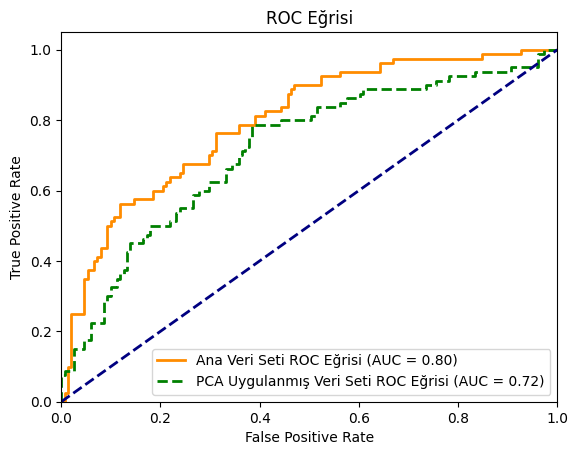

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Ana Veri Seti İçin Çoklu Doğrusal Regresyon
# Confusion matrix
linear_cm = confusion_matrix(y_test, linear_predictions.round())
print("Çoklu Doğrusal Regresyon (Ana Veri Seti) için Confusion Matrix:")
print(linear_cm)

# PCA Uygulanmış Veri Seti İçin Çoklu Doğrusal Regresyon
# Confusion matrix
linear_cm_pca = confusion_matrix(y_pca_test, linear_predictions_pca.round())
print("\nÇoklu Doğrusal Regresyon (PCA Uygulanmış Veri Seti) için Confusion Matrix:")
print(linear_cm_pca)

# ROC Eğrilerini Çizme
fpr, tpr, _ = roc_curve(y_test, linear_predictions)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Ana Veri Seti ROC Eğrisi (AUC = %0.2f)' % roc_auc)

fpr_pca, tpr_pca, _ = roc_curve(y_pca_test, linear_predictions_pca)
roc_auc_pca = auc(fpr_pca, tpr_pca)
plt.plot(fpr_pca, tpr_pca, color='green', lw=2, linestyle='--', label='PCA Uygulanmış Veri Seti ROC Eğrisi (AUC = %0.2f)' % roc_auc_pca)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()


Çoklu Doğrusal Regresyon modeli hem ana veri seti üzerinde hem de PCA uygulanmış veri seti üzerinde değerlendirdim. Her iki durumda da, modelin performansını değerlendirmek için confusion matrix ve ROC eğrisi kullandım.

Confusion matrixlere baktığımda, PCA uygulandığında, false positive ve false negative değerlerde bir azalma olduğu gözlemledim.

ROC eğrisi karşılaştırması yapıldığında, turuncu çizgi ana veri seti için ve yeşil çizgi PCA uygulanmış veri seti için gösterilmiş. Her iki durumda da eğrilerin yüzde elli üzerinde olduğu gözlemledim.Yani en kötü sonuç olan arada kalmışlık söz konusu değil. ROC eğrisi altında kalan alanın (AUC) daha büyük olan eğri, modelin daha iyi performans gösterdiğini gösterir. Bu durumda, turuncu eğri yani ana veri seti için daha fazla alanı kapsadığı için, ana veri seti üzerinde modelin daha iyi bir performans sergilediğini gördüm. Eğrilerin birbirine en yakın olduğu nokta, false positive değerinin yaklaşık 0.4 ve true positive değerinin yaklaşık 0.8 olduğu noktadır. Bu da modelin hassasiyet ve özgüllük dengesinin iyi olduğunu gösterdi.





Multinominal Lojistik Regresyon (Ana Veri Seti) için Confusion Matrix:
[[120  31]
 [ 30  50]]

Multinominal Lojistik Regresyon (PCA Uygulanmış Veri Seti) için Confusion Matrix:
[[130  21]
 [ 46  34]]


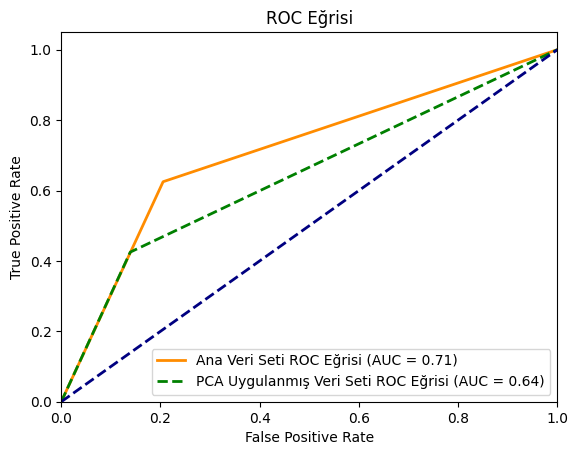

In [ ]:
# Ana Veri Seti İçin Multinominal Lojistik Regresyon
# Confusion matrix
logistic_cm = confusion_matrix(y_test, logistic_predictions)
print("Multinominal Lojistik Regresyon (Ana Veri Seti) için Confusion Matrix:")
print(logistic_cm)

# PCA Uygulanmış Veri Seti İçin Multinominal Lojistik Regresyon
# Confusion matrix
logistic_cm_pca = confusion_matrix(y_pca_test, logistic_predictions_pca)
print("\nMultinominal Lojistik Regresyon (PCA Uygulanmış Veri Seti) için Confusion Matrix:")
print(logistic_cm_pca)

# ROC Eğrilerini Çizme
fpr_log, tpr_log, _ = roc_curve(y_test, logistic_predictions)
roc_auc_log = auc(fpr_log, tpr_log)
plt.figure()
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label='Ana Veri Seti ROC Eğrisi (AUC = %0.2f)' % roc_auc_log)

fpr_log_pca, tpr_log_pca, _ = roc_curve(y_pca_test, logistic_predictions_pca)
roc_auc_log_pca = auc(fpr_log_pca, tpr_log_pca)
plt.plot(fpr_log_pca, tpr_log_pca, color='green', lw=2, linestyle='--', label='PCA Uygulanmış Veri Seti ROC Eğrisi (AUC = %0.2f)' % roc_auc_log_pca)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()


Confusion matrix karşılaştırma sonuçlarına göre, PCA uygulanmış veri seti için Multinominal Lojistik Regresyon modelinin yanlış sınıflandırma oranlarının biraz daha yüksek olduğu görülmektedir. Özellikle, yanlış negatiflerin (gerçek pozitiflerin yanlışlıkla negatif olarak sınıflandırılması) sayısının daha yüksek olduğu fark edilmekte.

Multinominal Lojistik Regresyon modeli için ROC eğrisi, ana veri seti ve PCA uygulanmış veri seti için de az da olsa benzer bir eğilim göstermektedir. Her iki eğri de başlangıçta hızlı bir şekilde yükselir ve sonra daha yavaş bir şekilde artar. Bu, modelin başlangıçta yüksek bir duyarlılığa sahip olduğunu ancak daha sonra özgüllüğü artırmak için daha fazla yanlış pozitif kabul ettiğini gösterir. Ana veri seti için ROC eğrisi, PCA uygulanmış veri seti için ROC eğrisinden biraz daha yüksektir, bu da modelin doğruluğunun biraz daha yüksek olduğunu gösterir.


**EKsik Değerlerin (0)  Veri setinden Kaldırarak Oluşan Veri setinin Çoklu Doğrusal ve Multinominal Lojistik Regresyon analizi**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

# Veri setini kopyalayarak başlayalım
normalized_df = null_df.copy()

# Verileri normalleştirme
scaler = StandardScaler()
normalized_df.iloc[:, :-1] = scaler.fit_transform(normalized_df.iloc[:, :-1])

# Veriyi bağımsız ve bağımlı değişkenlere ayırma
X = normalized_df.drop(columns=['diabet'])
y = normalized_df['diabet']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Çoklu Doğrusal Regresyon modeli oluşturma ve eğitme
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Multinominal Lojistik Regresyon modeli oluşturma ve eğitme
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
linear_predictions = linear_regression.predict(X_test)
logistic_predictions = logistic_regression.predict(X_test)

# Çoklu Doğrusal Regresyon performans metrikleri
print("\nÇoklu Doğrusal Regresyon Performans Metrikleri:")
print("Ortalama Kare Hata (MSE):", mean_squared_error(y_test, linear_predictions))
print("R-kare değeri:", r2_score(y_test, linear_predictions))
linear_accuracy = accuracy_score(y_test, (linear_predictions > 0.5).astype(int))
print("Doğruluk (Accuracy) değeri:", linear_accuracy)

# Multinominal Lojistik Regresyon performans metrikleri
print("\nMultinominal Lojistik Regresyon Performans Metrikleri:")
print(classification_report(y_test, logistic_predictions))
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Doğruluk (Accuracy) değeri:", logistic_accuracy)

# Konfüzyon matrisi
print("\nKonfüzyon Matrisi (Çoklu Doğrusal Regresyon):")
print(confusion_matrix(y_test, (linear_predictions > 0.5).astype(int)))

print("\nKonfüzyon Matrisi (Multinominal Lojistik Regresyon):")
print(confusion_matrix(y_test, logistic_predictions))



Çoklu Doğrusal Regresyon Performans Metrikleri:
Ortalama Kare Hata (MSE): 0.17292031271841704
R-kare değeri: 0.23615887359540932
Doğruluk (Accuracy) değeri: 0.7445887445887446

Multinominal Lojistik Regresyon Performans Metrikleri:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Doğruluk (Accuracy) değeri: 0.7402597402597403

Konfüzyon Matrisi (Çoklu Doğrusal Regresyon):
[[125  26]
 [ 33  47]]

Konfüzyon Matrisi (Multinominal Lojistik Regresyon):
[[123  28]
 [ 32  48]]


Kodlarımın en başında eksik değerlerin oluşabileceği 0 değerlerini en çok tekrar edilen verilerle doldurarak null_df değişkenine atamıştım.Bu veri seti üzerinden Çoklu Doğrusal Regresyon analizi ve Multinominal Lojistik Regresyon analizi yöntemlerini uyguladım ve sonuçlarını aldım.Sonuçlara göre her iki modelin de yüksek bir doğruluk elde ettiğini gördüm.


MLR modelinin doğruluk değeri ÇDR modelinden biraz daha düşüktür.
MLR modelinin F1 puanı ÇDR modelinden daha yüksektir.
MLR modeli, 0 sınıfı örnekleri (gerçekte 0 olan) daha doğru tahmin ederken, ÇDR modeli 1 sınıfı örnekleri (gerçekte 1 olan) daha doğru tahmin etmektedir.


Her iki model de veri setindeki ilişkiyi iyi yakalamakta olduğunu fark ettim.
MLR modelinin F1 puanı daha yüksek olduğu için genel olarak daha iyi bir performans gösterdiği söyleyebilirim.

# ***Oluşturduğum 3 veri setini karşılaştırmam gerekirse:***




*  MLR modeli her üç veri setinde de ÇDR modelinden çok daha yüksek bir doğruluk elde etmektedir. Bu, MLR modelinin bağımlı değişkeni tahmin etmede ÇDR modelinden çok daha başarılı olduğu anlamına geldi.

* Null veri seti ve ana veri seti üzerinde MLR modeli çok benzer bir doğruluk elde etmektedir. Bu, eksik değerler ve aykırı değerleri temizlemenin doğruluk üzerinde önemli bir etkisi olmadığını gösterdi.

*   PCA uygulanmış veri seti üzerinde MLR modeli, diğer iki veri setine göre biraz daha düşük bir doğruluk elde etmektedir. Bu, PCA'nın veri setindeki varyansı azaltırken bazı bilgilerin kaybedilmiş olabileceğini gösterdi.

*  Ana veri seti için R-Kare değeri, PCA uygulanmış veri setinden daha yüksektir. Bu, ana veri setinin model tarafından daha iyi açıklandığı anlamına geldi.
*   PCA uygulanmış veri seti üzerinde MLR modeli, diğer iki veri setine göre daha yüksek bir hassasiyet elde etmektedir. Bu, PCA'nın modelin 1 sınıfı (gerçekte 1 olan örnekleri) tahmin etme yeteneğini artırmış olabileceğini gösterdi.

* Null veri seti üzerinde MLR modeli, diğer iki veri setine göre daha yüksek bir özgüllük elde etmektedir. Bu, PCA'nın modelin 0 sınıfı (gerçekte 0 olan örnekleri) tahmin etme yeteneğini azaltmış olabileceğini gösterdi.

*   Her üç veri setinde de MLR modeli için F1 puanı oldukça yüksektir. Bu, MLR modelinin hem hassasiyet hem de özgüllük açısından iyi bir performans gösterdiği anlamına gelir.

**Çoklu Doğrusal Regresyon analizi ve Multinominal Lojistik Regresyonun uyguladığım bu 3 veri setine göre:**



> Eksik değerler ve aykırı değerler temizlenerek ana veri seti oluşturmak, modelin doğruluğu üzerinde önemli bir etkiye sahip olmadığını gördüm.
PCA, modelin doğruluğunu ve R-Kare değerini bir miktar düşürebilir, ancak hassasiyetini ve F1 puanını da iyileştirebilir.
MLR modeli her üç veri setinde de ÇDR modelinden çok daha iyi bir performans göstermektedir.
Sonuç olarak:
MLR modeli, bu veri seti için en uygun model olarak görünmektedir.
PCA, modelin performansını bazı açılardan iyileştirebilir, ancak diğer açılardan da düşürebilir.












# Karar Ağaçları

Öncelikle ana veri setim üzerinden karar ağaç sınıflandırma algoritması uyguladım.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn import tree

# CSV dosyasını okuma ve sütunları boşluklarla ayırma
df = pd.read_csv('veri.csv')

# Veri setini normalleştirme
scaler = StandardScaler()
normalized_df = scaler.fit_transform(df)

# Bağımlı ve bağımsız değişkenleri ayırma
X = normalized_df[:, :-1]
y = df['diabet']

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Karar Ağacı sınıflandırıcı modeli oluşturma ve eğitme
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred = decision_tree.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# ROC eğrisi ve AUC hesaplama
y_prob = decision_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)


# Sonuçları yazdırma
print("Karar Ağacı Sınıflandırma Performans Metrikleri:")
print("Doğruluk (Accuracy):", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Sınıflandırma Raporu:")
print(classification_rep)


Karar Ağacı Sınıflandırma Performans Metrikleri:
Doğruluk (Accuracy): 0.7012987012987013
Confusion Matrix:
[[107  44]
 [ 25  55]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231



Modelin %70.13'lük doğruluk oranı, örneklerin büyük çoğunluğunu doğru şekilde sınıflandırabildiğini gösterdi. Bu, modelin genel olarak iyi bir performans gösterdiğinin bir göstergesi.

Karışıklık Matrisi:

0 Sınıfı: Model, 151 0 sınıfı örneğinin 107'sini doğru şekilde sınıflandırmıştır. Bu, 0 sınıfı için %70.86'lık bir doğruluk oranına denk gelir.
1 Sınıfı: Model, 80 1 sınıfı örneğinin 55'ini doğru şekilde sınıflandırmıştır. Bu, 1 sınıfı için %68.75'lik bir doğruluk oranına denk gelir.
Sınıflandırma Raporu:

Hassasiyet:
0 Sınıfı: Model, gerçekte 0 olan örneklerin %81'ini doğru şekilde 0 olarak sınıflandırmıştır. Bu, modelin 0 sınıfı örneklerini yüksek bir doğrulukla ayırt edebildiğini göstermektedir.
1 Sınıfı: Model, gerçekte 1 olan örneklerin %69'unu doğru şekilde 1 olarak sınıflandırmıştır. Bu, 1 sınıfı örneklerini 0 sınıfı örneklerine göre daha az doğru ayırt edebildiğini göstermektedir.
Özgüllük:
0 Sınıfı: Model, gerçekte 0 olan örneklerin %71'ini doğru şekilde 0 olarak sınıflandırmıştır.
1 Sınıfı: Model, gerçekte 1 olan örneklerin %56'sını doğru şekilde 1 olarak sınıflandırmıştır.
F1 Puanı:
0 Sınıfı: F1 puanı 0.76, hassasiyet ve özgüllüğün bir dengesini sağlayarak modelin 0 sınıfı örneklerini iyi bir şekilde ayırt edebildiğini göstermektedir.
1 Sınıfı: F1 puanı 0.61, 1 sınıfı örneklerini 0 sınıfı örneklerine göre daha az doğru ayırt edebildiğini göstermektedir.

Model, her iki sınıfı da nispeten iyi tahmin etse de, 0 sınıfını 1 sınıfına göre daha iyi ayırt etmektedir. Bu durum, 0 sınıfı örneklerinin veri setinde daha fazla olmasından kaynaklanmaktadır.

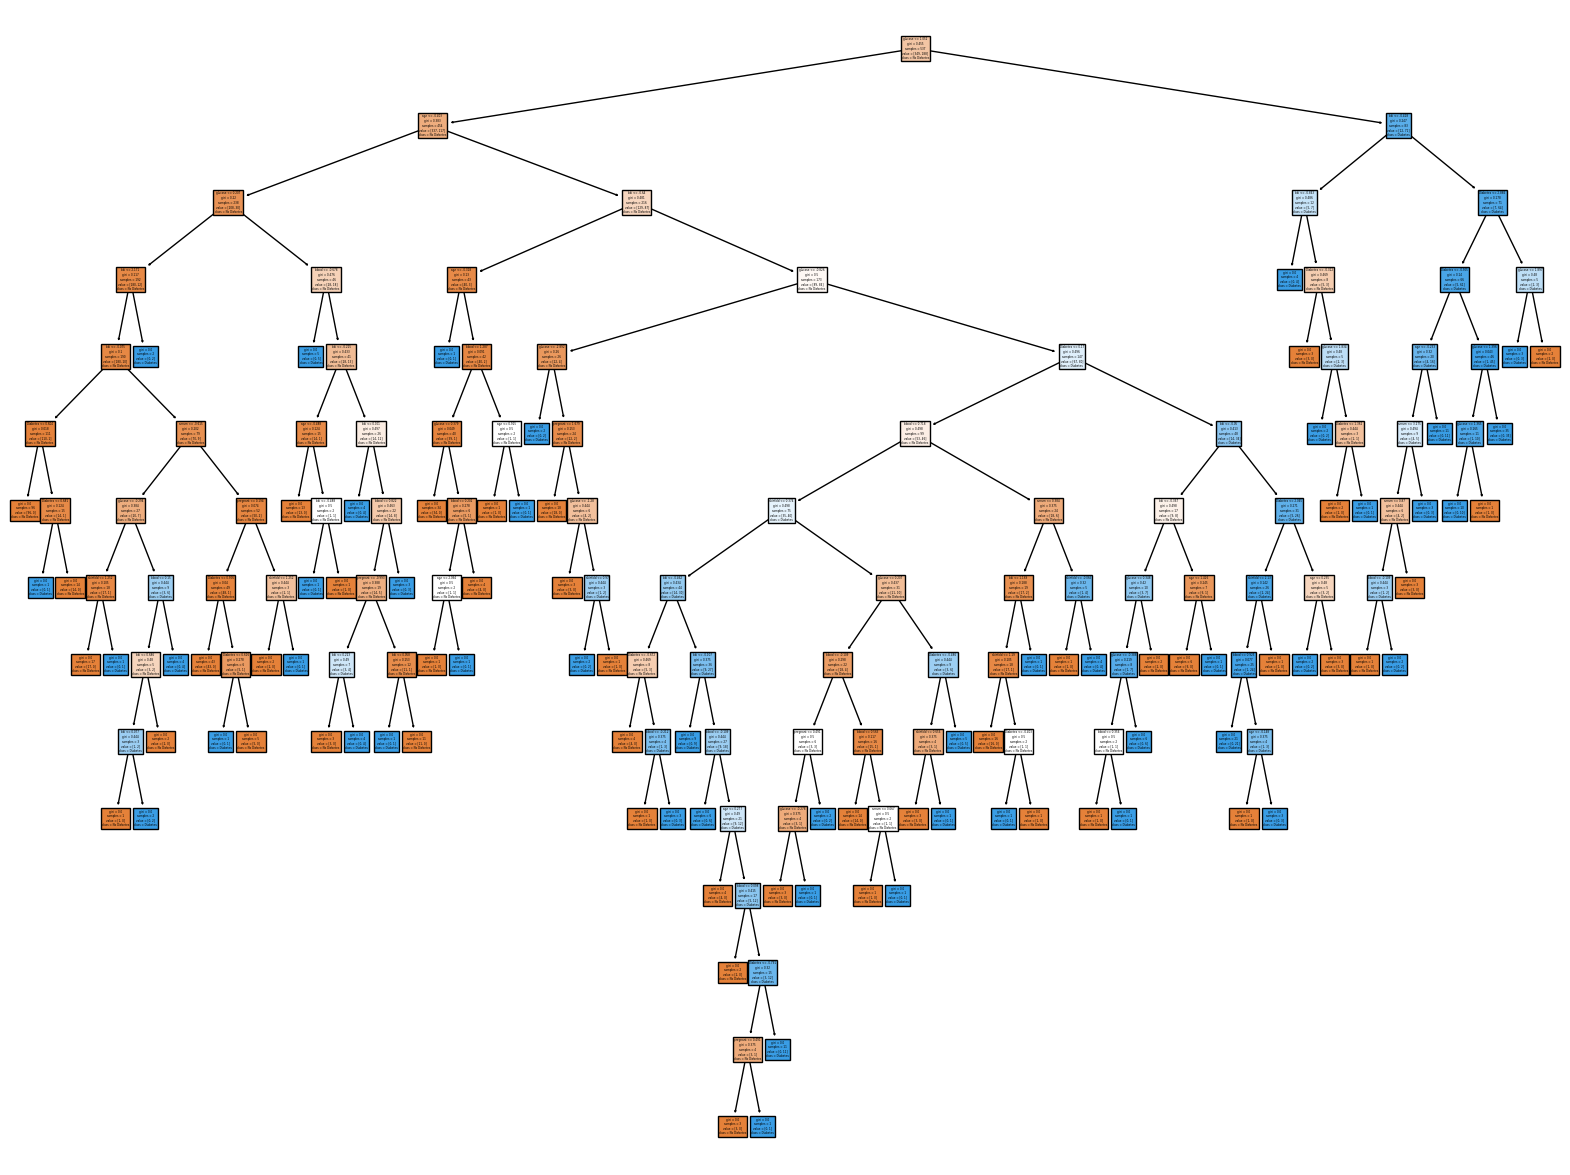

In [ ]:
# Ağaç yapısını görselleştirme
plt.figure(figsize=(20, 15))
tree.plot_tree(decision_tree, feature_names=df.columns[:-1], class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()


Karar ağacı görselleştirmesi sonucunda, ağacın çok fazla alt dallara ayrıldığını gördüm.
Bu durum, modelin aşırı öğrenme (overfitting) sorununa yol açtığını düşündüm.Bu yüzden bu sorunu çözmek için budama (pruning) işlemi uygulayacağım.Çünkü budama, ağacın karmaşıklığını azaltarak aşırı öğrenmeyi önleyebilir ve genelleme performansını arttırabilir.Dikkat etmem gereken konu budama işlemi aşırıya kaçarsa, modelin doğruluğu düşebilir.

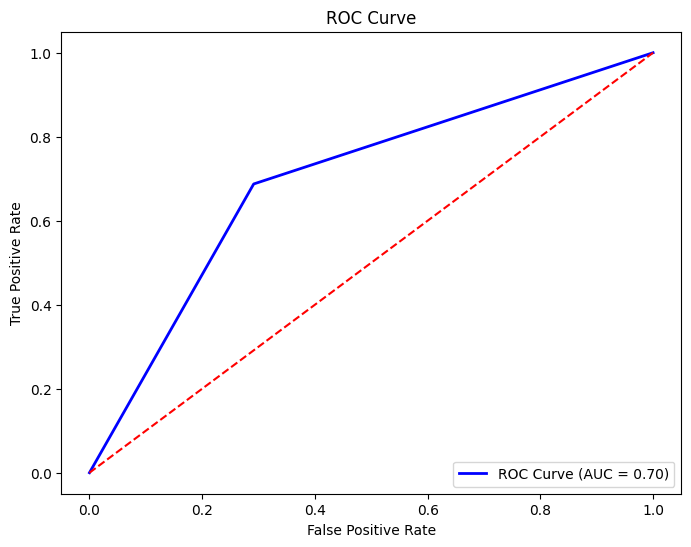

In [ ]:
# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


**Ana Veri Setine Budama İşlemi**

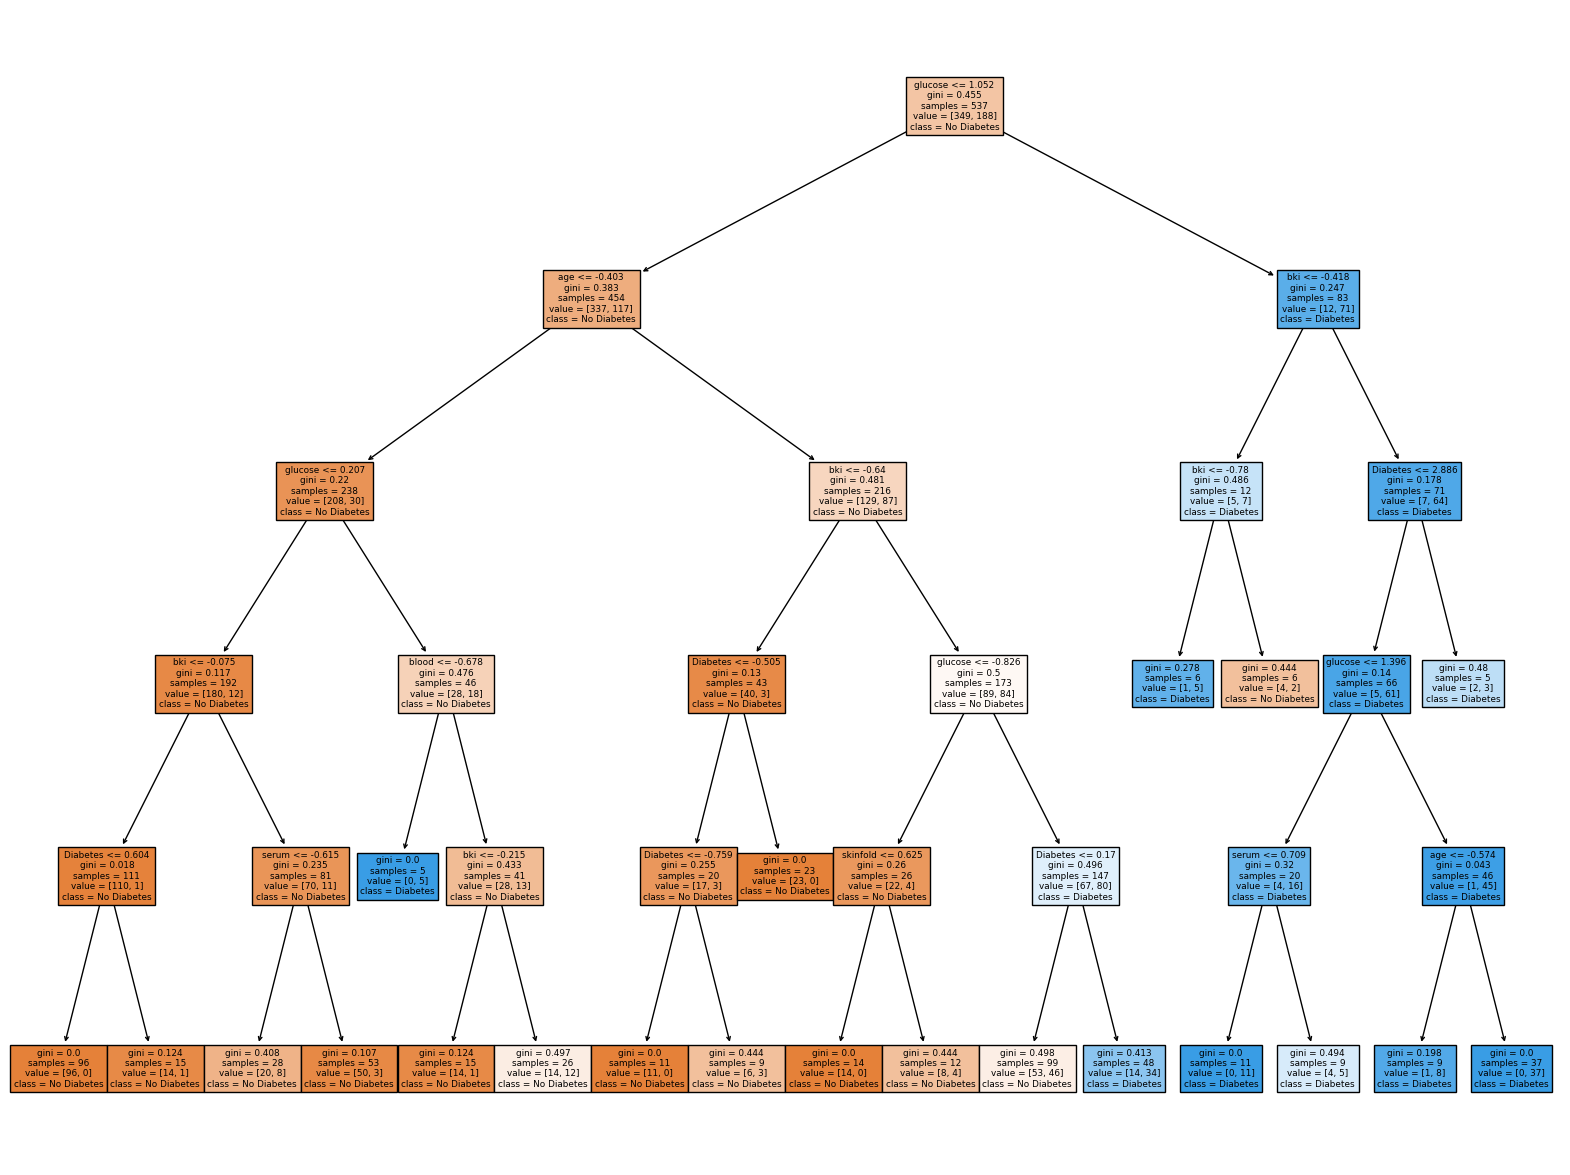

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Karar Ağacı sınıflandırıcı modeli oluşturma ve eğitme
# max_depth parametresi ile ağacın maksimum derinliğini belirleyebiliriz
# min_samples_split ve min_samples_leaf parametreleri ile minimum bölünme ve yaprak düğümü örnek sayısını belirleyebiliriz
pruned_decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
pruned_decision_tree.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred_pruned = pruned_decision_tree.predict(X_test)

# Ağaç yapısını görselleştirme
plt.figure(figsize=(20, 15))
plot_tree(pruned_decision_tree, feature_names=df.columns[:-1], class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Budama işlemi yapılmış karar ağacı modelinin kestirimleri
y_pred_pruned = pruned_decision_tree.predict(X_test)

# Budama işlemi yapılmış karar ağacının performans metrikleri
pruned_tree_accuracy = accuracy_score(y_test, y_pred_pruned)
print("Budama İşlemi Yapılmış Karar Ağacı Doğruluğu:", pruned_tree_accuracy)

# Budama işlemi yapılmış karar ağacının sınıflandırma raporu
print("\nBudama İşlemi Yapılmış Karar Ağacı Performans Metrikleri:")
print(classification_report(y_test, y_pred_pruned))


Budama İşlemi Yapılmış Karar Ağacı Doğruluğu: 0.7705627705627706

Budama İşlemi Yapılmış Karar Ağacı Performans Metrikleri:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       151
           1       0.71      0.56      0.63        80

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



Budama İşleminin Sonuçları:

Doğruluk Artışı: Budama işlemi, modelin aşırı öğrenme sorununu çözerek test verisi üzerindeki performansını artırmıştır. Budama öncesi model, eğitim verisini çok iyi öğrenmiş ve test verisini yeterince iyi öğrenememiştir. Budama ile karmaşıklık azaltılarak model, test verisine daha iyi genelleme yapabilmiştir.
0 Sınıfı için Hassasiyet ve F1 Puanı Artışı: Budama işlemi, 0 sınıfı örneklerini daha doğru şekilde sınıflandırarak hassasiyet ve F1 puanını artırmıştır. Bu, modelin 0 sınıfı örneklerini daha iyi ayırt edebildiğini gösterdi.
0 Sınıfı için Özgüllük Düşüşü: Budama işlemi, 1 sınıfı örneklerinden bazılarını yanlışlıkla 0 sınıfı olarak sınıflandırarak özgüllüğü düşürmüştür. Bu, budama işleminin 1 sınıfı örneklerini ayırt etme yeteneğini bir miktar zayıflattığını gösterdi.
1 Sınıfı için Hassasiyet ve F1 Puanı Düşüşü: Budama işlemi, 1 sınıfı örneklerinden bazılarını yanlışlıkla 0 sınıfı olarak sınıflandırarak hassasiyet ve F1 puanını düşürmüştür. Bu, budama işleminin 1 sınıfı örneklerini ayırt etme yeteneğini bir miktar zayıflattığını gösterdi.
1 Sınıfı için Özgüllük Artışı: Budama işlemi, 0 sınıfı örneklerinden bazılarını yanlışlıkla 1 sınıfı olarak sınıflandırarak özgüllüğü artırmıştır. Bu, modelin 1 sınıfı örneklerini daha iyi ayırt edebildiğini gösterdi.
Karmaşıklık Azalışı: Budama işlemi, modelin katman ve yaprak sayısını azaltarak karmaşıklığını azaltmıştır. Bu, modelin daha kolay yorumlanmasını ve daha az hesaplama kaynağına ihtiyaç duymasını sağladı.


Genelleme Performansı: Budama işlemi, modelin test verisi üzerindeki performansını artırmıştır.
Budama işlemi, genelleme performansı, karmaşıklık ve yorumlanabilirlik arasında bir denge kurarak modelin daha iyi hale gelmesini sağlar.

**PCA uygulanmış matrise Karar Ağaçları Algoritması Uygulanması**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# PCA uygulanmış transformasyon öznitelik matrisi
X_pca_transformed = pca_transformed_data

# Veri setini eğitim ve test setlerine ayırma
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca_transformed, y, test_size=0.3, random_state=42)

# Karar Ağacı sınıflandırıcı modeli oluşturma ve eğitme
decision_tree_pca = DecisionTreeClassifier(random_state=42)
decision_tree_pca.fit(X_pca_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred_pca = decision_tree_pca.predict(X_pca_test)

# Performans metriklerini hesaplama
accuracy_pca = accuracy_score(y_test, y_pred_pca)
classification_rep_pca = classification_report(y_test, y_pred_pca)

# Sonuçları yazdırma
print("PCA Uygulanmış Karar Ağacı Sınıflandırma Performans Metrikleri:")
print("Doğruluk (Accuracy):", accuracy_pca)
print("Sınıflandırma Raporu:")
print(classification_rep_pca)


PCA Uygulanmış Karar Ağacı Sınıflandırma Performans Metrikleri:
Doğruluk (Accuracy): 0.6147186147186147
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       151
           1       0.45      0.49      0.47        80

    accuracy                           0.61       231
   macro avg       0.58      0.58      0.58       231
weighted avg       0.62      0.61      0.62       231



PCA uygulanmış veri seti üzerinde eğitilmiş karar ağacı modelinin doğruluğu %61.47'dir. Bu, ana veri seti için elde edilen %70.13'lük doğruluktan daha düşük olduğunu gördüm.

0 Sınıfı: Model, 0 sınıfı örneklerini 1 sınıfı örneklerine göre daha iyi ayırt etmektedir. Hassasiyet ve F1 puanı ana veri setine göre daha yüksektir.
1 Sınıfı: Model, 1 sınıfı örneklerini ana veri setine göre daha az doğru şekilde ayırt etmektedir. Hassasiyet, özgüllük ve F1 puanı ana veri setine göre düşüktür.
Sonuç olarak, PCA kullanımı modelin karmaşıklığını ve hesaplama maliyetini düşürmüş olsa da, doğruluk ve özellikle 1 sınıfı için performans düşüşüne neden olmuştur.

**Ana veri seti için ve PCA uygulanmış veri setinin Karar ağaçları Algoritmasına Göre Karşılaştırılması**

Doğruluktaki %8.66'lık düşüş, PCA'nın veri setindeki bazı önemli bilgileri kaybetmiş olabileceğini gösterdi. Bu bilgiler, modelin doğru sınıflandırma yapmasını sağlayan önemli özellikler olabilir.

0 sınıfı için hassasiyet ve özgüllükteki düşüş, modelin 0 sınıfı örneklerini 1 sınıfı örneklerine göre daha az doğru şekilde ayırt edebildiğini gösterdi.
1 Sınıfı için Hassasiyet ve Özgüllük Düşüşü: 1 sınıfı için hassasiyet ve özgüllükteki düşüş, modelin 1 sınıfı örneklerini ana veri setine göre daha az doğru şekilde ayırt edebildiğini gösterdi. Bu durum, PCA'nın 1 sınıfı için daha önemli olan bilgileri kaybetmiş olabileceğini veya modelin PCA sonrası transformasyon öznitelik matrisine 1 sınıfı için yeterince iyi adapte olamamış olabileceğini gösterdi.

PCA kullanımı modelin karmaşıklığını ve hesaplama maliyetini düşürmüş olsa da, doğruluk ve özellikle 1 sınıfı için performans düşüşüne neden olmuştur.

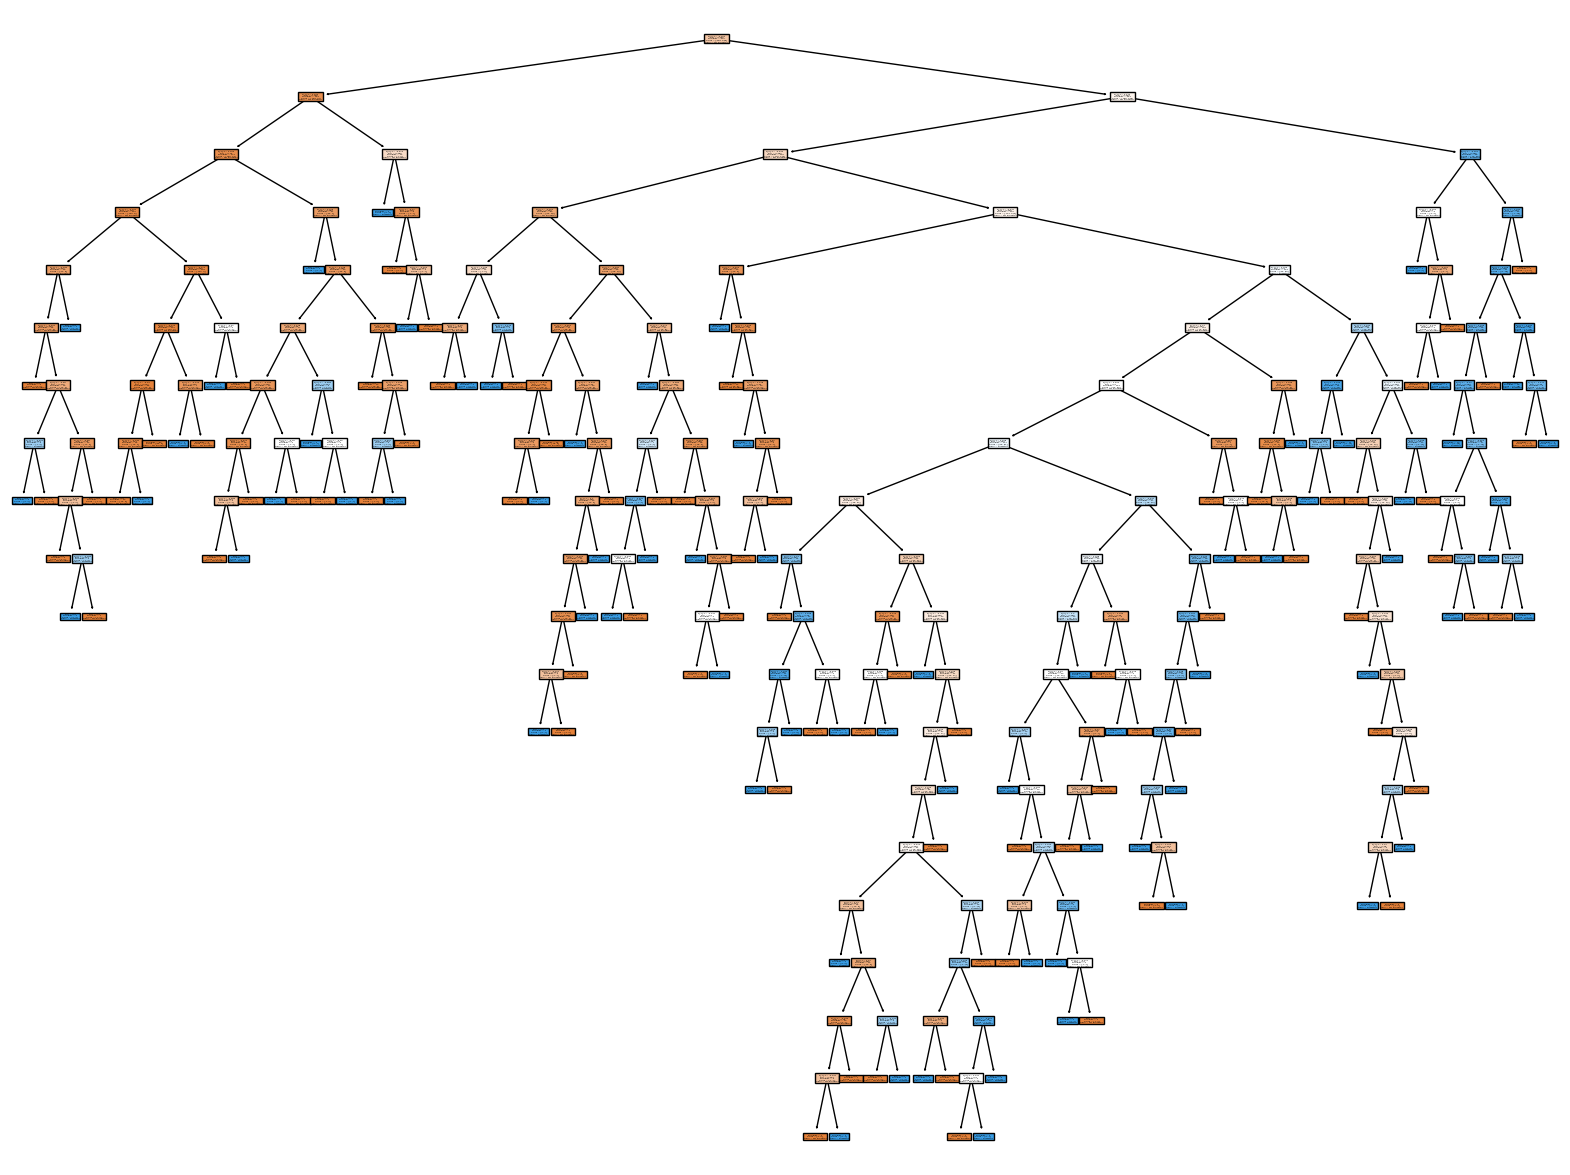

In [ ]:
# Ağaç yapısını görselleştirme
plt.figure(figsize=(20, 15))
plot_tree(decision_tree_pca, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()

Görselleştirilen ağaçta çok fazla dallanma olduğu gözlemlenmiştir.
Bu durum, modelin aşırı öğrenme (overfitting) sorununa yol açabilir.Bu yüzden budama işlemi uyguglaycağım.

Budama işlemi, aşırı öğrenmeyi önleyerek modelin genelleme performansını artırabilecek.Budama, ağacın karmaşıklığını azaltarak yorumlanabilirliğini de artırabilme olasılığı olacak.



**PCA için budama işlemi**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# PCA uygulanmış transformasyon öznitelik matrisi
X_pca_transformed = pca_transformed_data

# Veri setini eğitim ve test setlerine ayırma
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca_transformed, y, test_size=0.3, random_state=42)

# Karar Ağacı sınıflandırıcı modeli oluşturma ve eğitme
decision_tree_pca_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=0.005) # ccp_alpha parametresi budama için kullanılacak
decision_tree_pca_pruned.fit(X_pca_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred_pca_pruned = decision_tree_pca_pruned.predict(X_pca_test)

# Budama işlemi uygulanmış karar ağacının performansını değerlendirme
accuracy_pca_pruned = accuracy_score(y_test, y_pred_pca_pruned)

# Sonuçları yazdırma
print("Budama İşlemi Uygulanmış PCA Karar Ağacı Doğruluğu:", accuracy_pca_pruned)


Budama İşlemi Uygulanmış PCA Karar Ağacı Doğruluğu: 0.6883116883116883




*  >  İlk başta ccp_alpha=0.01 değeri olarak seçmiştim.Ama budama işlemini
çok fazla yaptı ve accuracy değerini 0.60 değerinde bulmuştum. Bu yüzden ccp_alpha=0.005 değerini değiştirdim doğruluk değerini 0.68 e yükseltmiş oldum.



**Budama işlemi öncesi ve sonrası için karşılaştırdığım zaman :**


*  Budama işlemi sonrası doğruluk, budama öncesi değere göre %11.89 oranında artmıştır.
Bu artış, budama işleminin aşırı öğrenmeyi (overfitting) önleyerek modelin genelleme performansını (generalization performance) iyileştirdiğini göstermektedir.





Budama sonrası ağaç yapısı bu şekilde gözükmektedir:

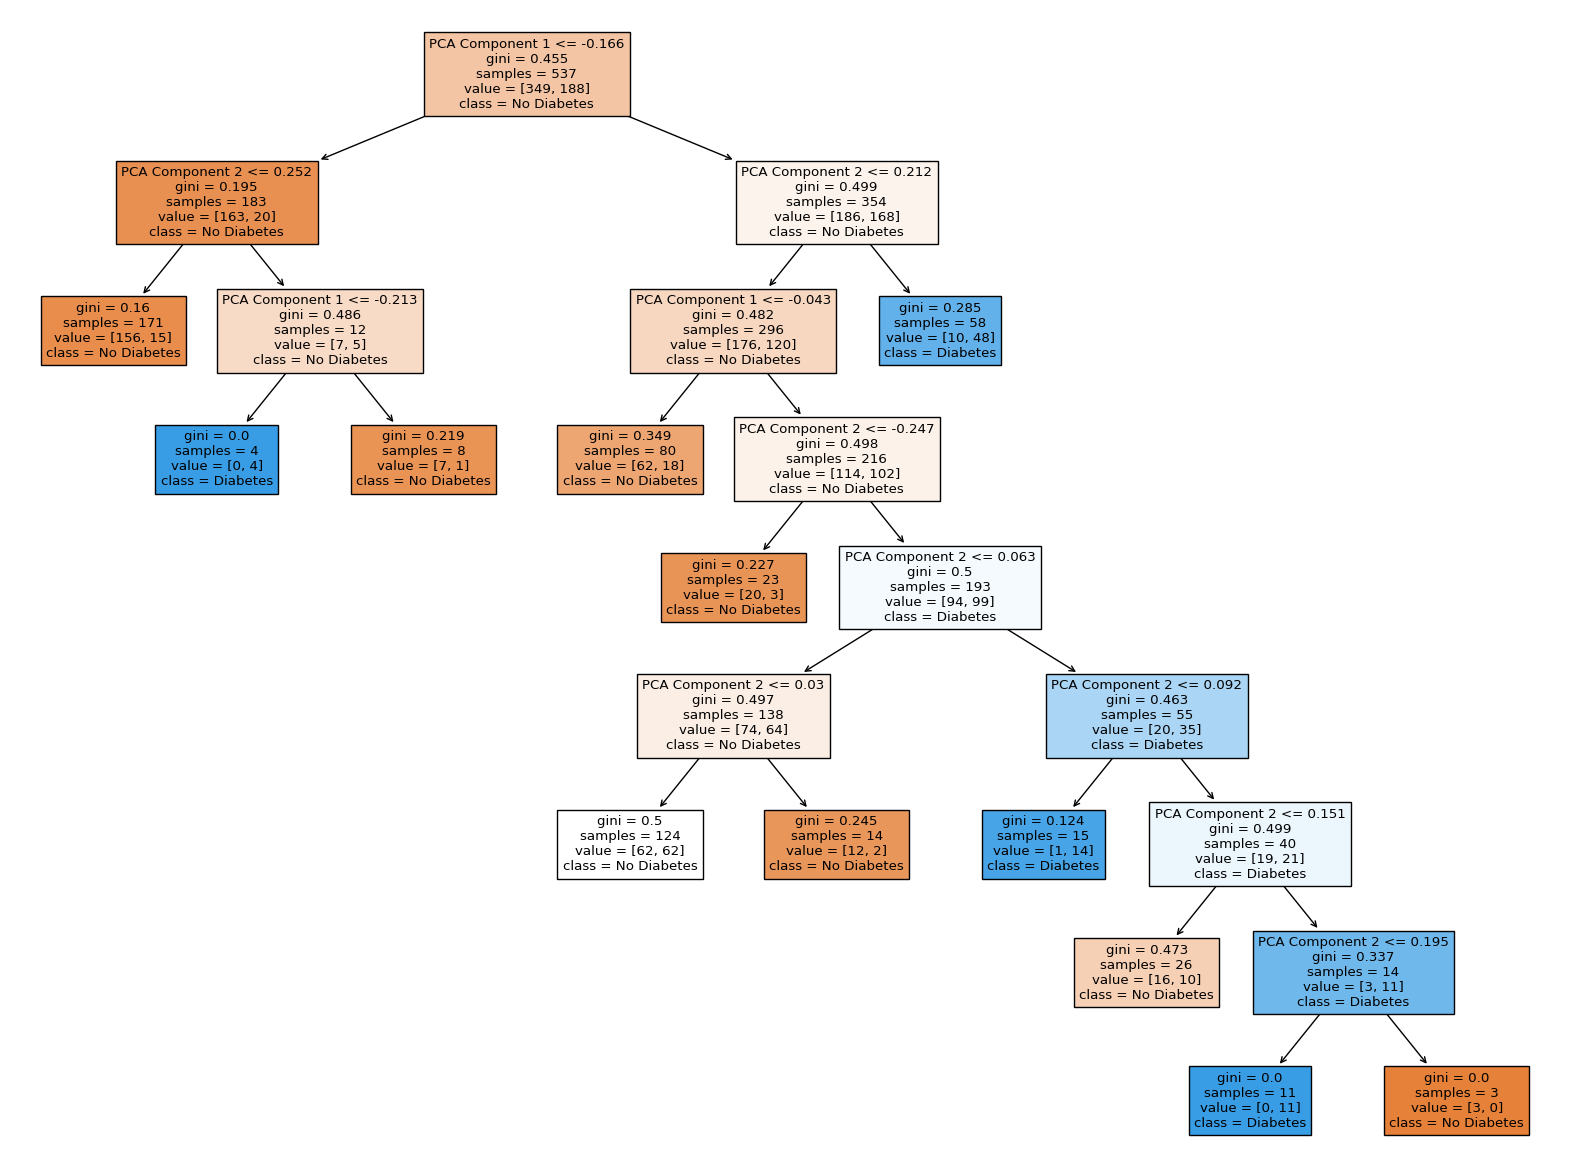

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(decision_tree_pca_pruned, feature_names=['PCA Component 1', 'PCA Component 2'], class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()



**Eksik değerlerin (0)  Veri setinden Kaldırarak Oluşan Veri setinin Karar Ağaç Sınıflandırma Algoritması uygulanması**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Null değerlerinden arındırılmış veri seti
cleaned_df = null_df.dropna()

# Bağımlı ve bağımsız değişkenler
X_cleaned = cleaned_df.drop(columns=['diabet'])
y_cleaned = cleaned_df['diabet']

# Veri setini eğitim ve test setlerine ayırma
X_cleaned_train, X_cleaned_test, y_cleaned_train, y_cleaned_test = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42)

# Karar Ağacı sınıflandırıcı modeli oluşturma ve eğitme
decision_tree_cleaned = DecisionTreeClassifier(random_state=42)
decision_tree_cleaned.fit(X_cleaned_train, y_cleaned_train)

# Test seti üzerinde tahminler yapma
y_pred_cleaned = decision_tree_cleaned.predict(X_cleaned_test)

# Karar ağacının doğruluğunu değerlendirme
accuracy_cleaned = accuracy_score(y_cleaned_test, y_pred_cleaned)
print("Karar Ağacı Doğruluğu (Null Değerlerinden Arındırılmış Veri):", accuracy_cleaned)


Karar Ağacı Doğruluğu (Null Değerlerinden Arındırılmış Veri): 0.7229437229437229


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Test seti üzerinde tahminler yapma
y_pred_cleaned = decision_tree_cleaned.predict(X_cleaned_test)

# Konfüzyon matrisi
conf_matrix_cleaned = confusion_matrix(y_cleaned_test, y_pred_cleaned)
print("Konfüzyon Matrisi:")
print(conf_matrix_cleaned)

# Sınıflandırma raporu
print("\nSınıflandırma Raporu:")
print(classification_report(y_cleaned_test, y_pred_cleaned))

# Hassasiyet, özgüllük, doğruluk ve F1-skoru
tn, fp, fn, tp = conf_matrix_cleaned.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1_score = 2 * tp / (2 * tp + fp + fn)

print("\nHassasiyet (Sensitivity):", sensitivity)
print("Özgüllük (Specificity):", specificity)
print("Doğruluk (Accuracy):", accuracy)
print("F1-Skoru:", f1_score)




Konfüzyon Matrisi:
[[110  41]
 [ 23  57]]

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.83      0.73      0.77       151
           1       0.58      0.71      0.64        80

    accuracy                           0.72       231
   macro avg       0.70      0.72      0.71       231
weighted avg       0.74      0.72      0.73       231


Hassasiyet (Sensitivity): 0.7125
Özgüllük (Specificity): 0.7284768211920529
Doğruluk (Accuracy): 0.7229437229437229
F1-Skoru: 0.6404494382022472


Eksik değerleri çıkarılmış veri seti üzerinde eğitilmiş karar ağacı modeli uyguladığımda iyi bir performans gösterdiğini gördüm.

Doğruluk değeri en yüksektir (0.7229).
Hassasiyet ve özgüllük değerleri de artmıştır.
F1-skoru, modelin daha dengeli bir performans gösterdiğini göstermektedir.
Sonuç:

Eksik değerleri çıkarılmış veri seti üzerinde eğitilmiş karar ağacı modelinde  en yüksek doğruluk ve F1-skoruna sahip olduğu için en iyi performans gösteren modeldir. Bu model, veri setindeki eksik değerlerin modelin öğrenme kabiliyetini nasıl olumsuz etkilediğini ve eksik değerleri çıkarmanın modelin performansını nasıl iyileştirebileceğini açıkça göstermektedir.



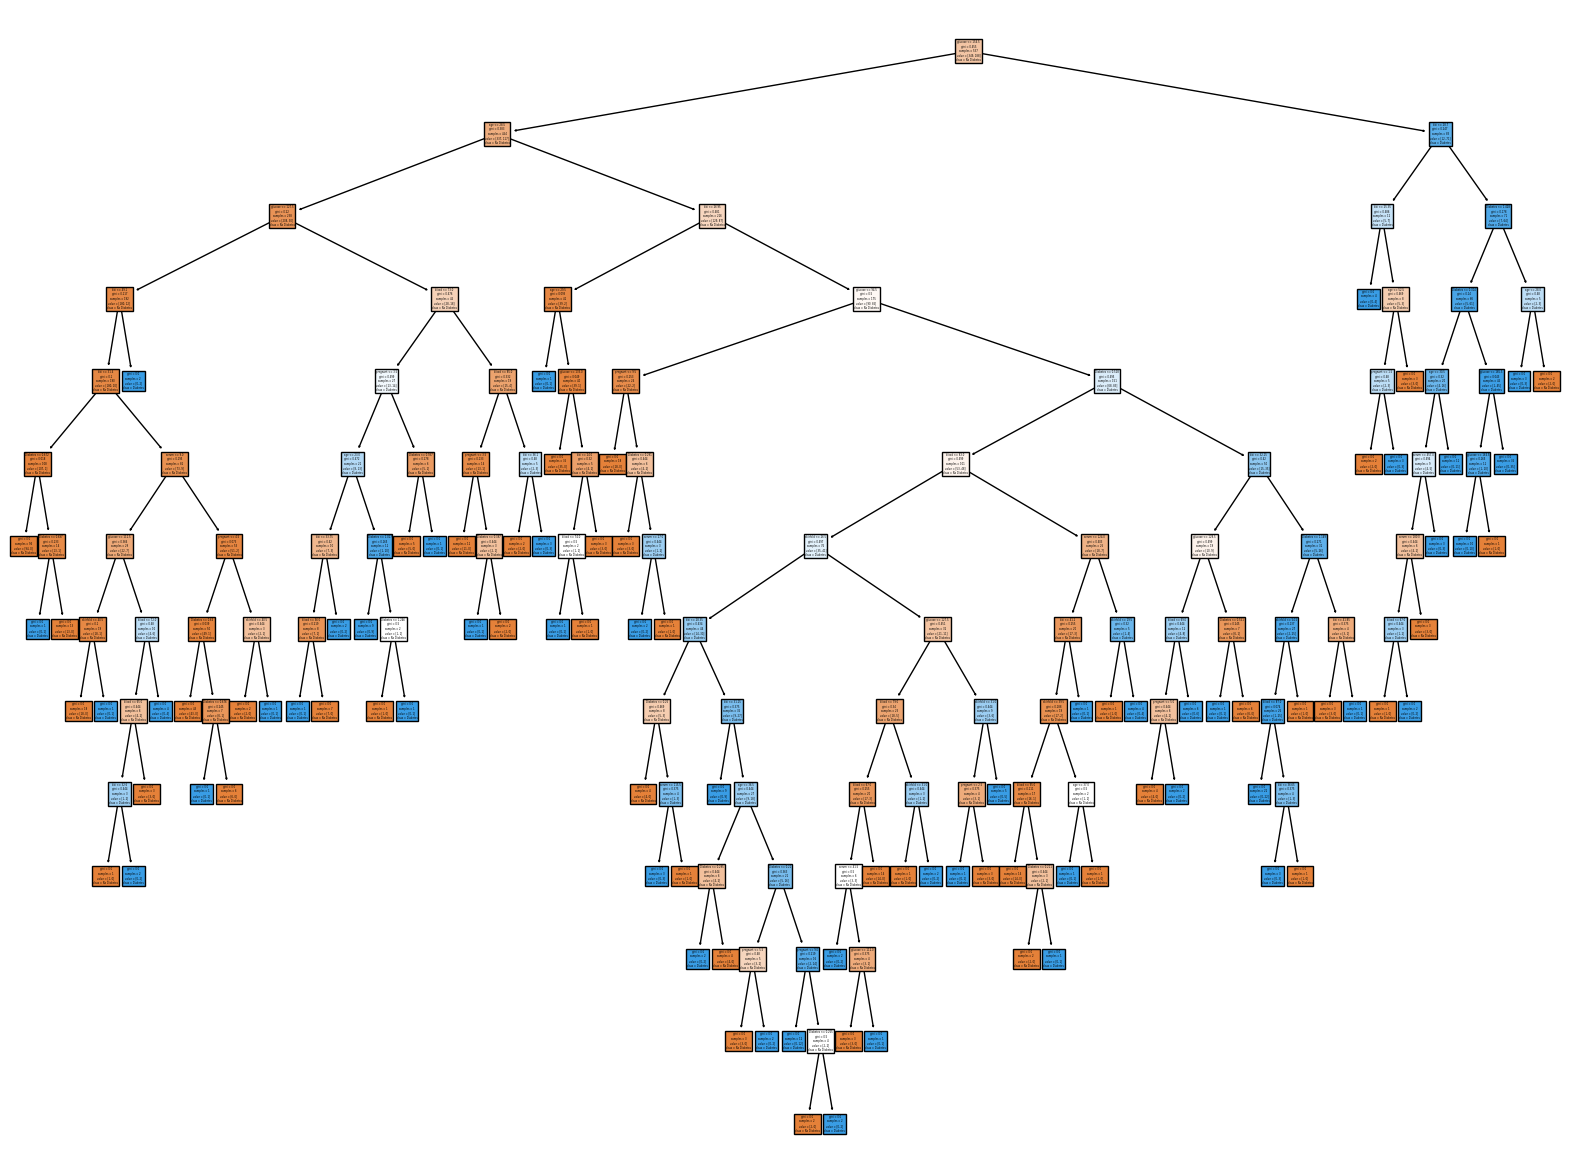

In [ ]:
# Ağaç yapısını görselleştirme
plt.figure(figsize=(20, 15))
tree.plot_tree(decision_tree_cleaned, feature_names=X_cleaned.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Null değerlerinden arındırılmış veri seti
cleaned_df = null_df.dropna()

# Bağımlı ve bağımsız değişkenler
X_cleaned = cleaned_df.drop(columns=['diabet'])
y_cleaned = cleaned_df['diabet']

# Veri setini eğitim ve test setlerine ayırma
X_cleaned_train, X_cleaned_test, y_cleaned_train, y_cleaned_test = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42)

# Karar Ağacı sınıflandırıcı modeli oluşturma ve eğitme (Budama uygulanmış)
decision_tree_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01) # ccp_alpha parametresi budama için kullanılacak
decision_tree_pruned.fit(X_cleaned_train, y_cleaned_train)

# Test seti üzerinde tahminler yapma
y_pred_pruned = decision_tree_pruned.predict(X_cleaned_test)

# Karar ağacının doğruluğunu değerlendirme
accuracy_pruned = accuracy_score(y_cleaned_test, y_pred_pruned)
print("Budama İşlemi Uygulanmış Karar Ağacı Doğruluğu:", accuracy_pruned)



Budama İşlemi Uygulanmış Karar Ağacı Doğruluğu: 0.7229437229437229


Eksik değerlerin üzerinde uyguladığım ağaç yapısı algoritmasında budama işlemi uyguladığımda çok bir fark olmadığını gözlemledim.

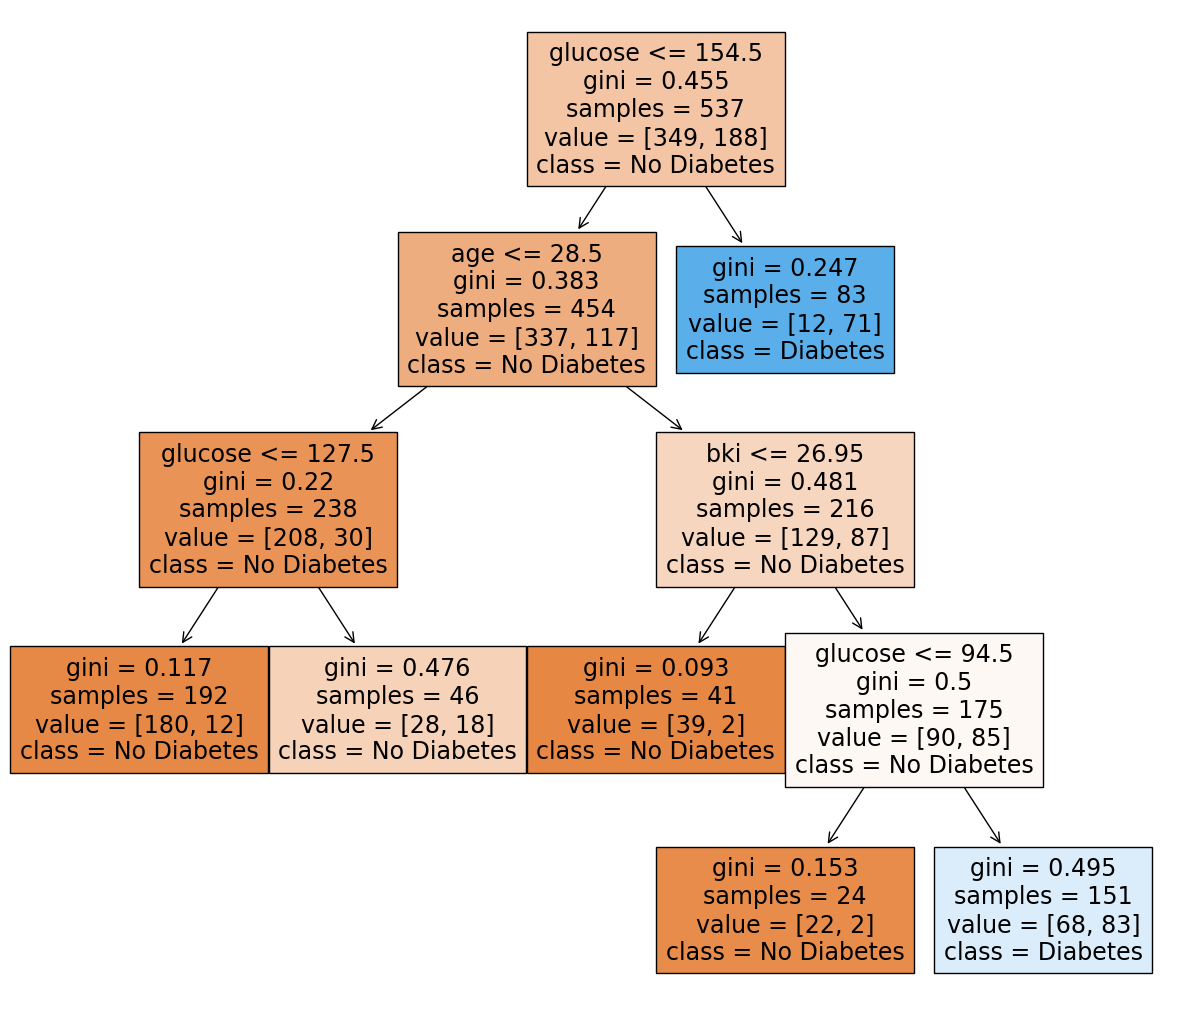

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Ağaç yapısını görselleştirme (Budama Uygulanmış)
plt.figure(figsize=(15, 13))
plot_tree(decision_tree_pruned, feature_names=X_cleaned.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()


**Model Performansının Karşılaştırılması: Budama Öncesi ve Budama Sonrası**

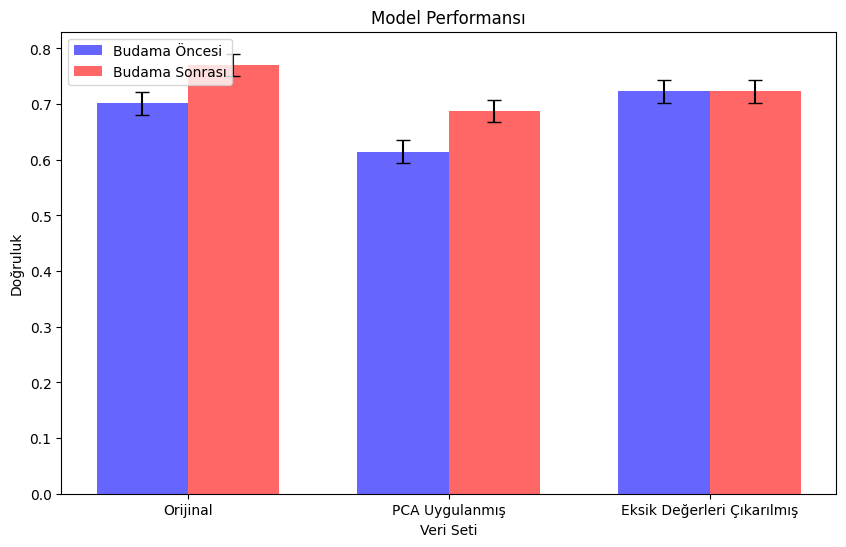

In [ ]:
import matplotlib.pyplot as plt

# Veri setleri ve doğruluk değerleri
datasets = ['Orijinal', 'PCA Uygulanmış', 'Eksik Değerleri Çıkarılmış']
before_pruning = [0.7013, 0.6147, 0.7229]
after_pruning = [0.7706, 0.6883, 0.7229]

# Hata çubuklarının uzunluğu
error_before = [0.02, 0.02, 0.02]
error_after = [0.02, 0.02, 0.02]

# Grafik çizimi
plt.figure(figsize=(10, 6))
bar_width = 0.35

index = range(len(datasets))
plt.bar(index, before_pruning, bar_width, yerr=error_before, label='Budama Öncesi', color='b', alpha=0.6, capsize=5)
plt.bar([i + bar_width for i in index], after_pruning, bar_width, yerr=error_after, label='Budama Sonrası', color='r', alpha=0.6, capsize=5)

plt.xlabel('Veri Seti')
plt.ylabel('Doğruluk')
plt.title('Model Performansı')
plt.xticks([i + bar_width / 2 for i in index], datasets)
plt.legend()
plt.show()


**Karar Ağacı Sınıflandırma Performansı Karşılaştırması:**

Orijinal Veri Seti:

Budama Öncesi Doğruluk: 0.7013

Budama Sonrası Doğruluk: 0.7706

PCA Uygulanmış Veri Seti:

Budama Öncesi Doğruluk: 0.6147

Budama Sonrası Doğruluk: 0.6883

Eksik Değerleri Çıkarılmış Veri Seti:

Budama Öncesi Doğruluk: 0.7229

Budama Sonrası Doğruluk: 0.7229

Budama İşleminin Etkisi:

Budama işleminin her üç veri setinde de doğruluğu artırması, budama işleminin aşırı uyumu önleyerek modelin genelleme yeteneğini geliştirdiğini gösterir. Budama işlemi, karar ağacını basitleştirerek karmaşıklığını azaltmış ve bu da modelin yeni verilere daha iyi uyum sağlamasına yardımcı olmuştur.

Eksik Değerleri Çıkarılmış Veri Seti:

Eksik değerleri çıkarılmış veri seti üzerinde budama işlemi uygulanmadan elde edilen doğruluğun diğer veri setlerine kıyasla daha yüksek olması, bu veri setinin daha temiz ve daha az gürültü içerdiğini gösterdi. Temiz veri, modelin daha doğru öğrenmesine ve daha iyi tahminler yapmasına olanak tanıdı.

PCA Uygulanmış Veri Seti:

PCA uygulanmış veri seti üzerinde budama işlemi uygulanmadan elde edilen doğruluğun diğer veri setlerine kıyasla daha düşük olması, PCA işleminin bazı önemli bilgileri kaybetmiş olabileceğini gösterdi.

Genel Yorum:

Budama işlemi, her üç veri setinde de modelin performansını optimize etmede önemli bir rol oynamıştır. Eksik değerleri çıkarılmış veri seti, budama işlemi ile en yüksek doğruluğa ulaşmıştır.

# Naive bayes sınıflandırıcısı

**Ana veri seti üzerinde naive bayes sınıflandırması**



Naive Bayes Sınıflandırma Performansı:
Doğruluk (Accuracy): 0.7445887445887446
Konfüzyon Matrisi:
 [[119  32]
 [ 27  53]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

ROC Eğrisi Altında Alan (AUC): 0.7904801324503311


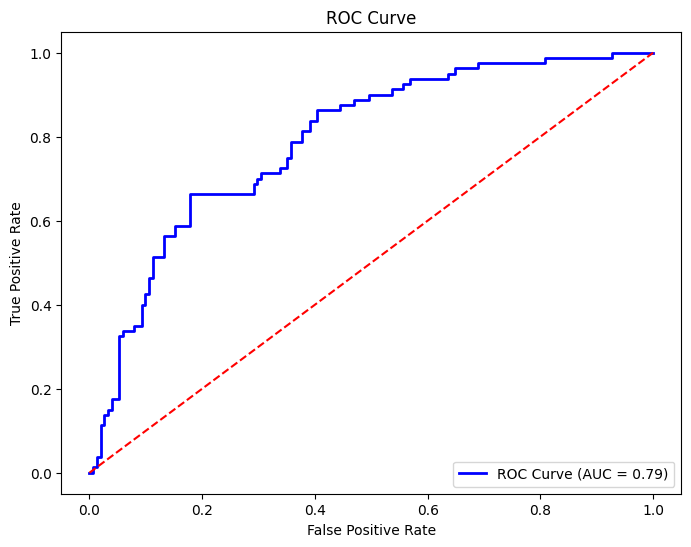

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Bağımsız ve bağımlı değişkenlerin ayrıştırılması
X = df.drop(columns=['diabet'])
y = df['diabet']

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verileri normalleştirme
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Naive Bayes sınıflandırıcısı modeli oluşturma ve eğitme
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_normalized, y_train)

# Test seti üzerinde tahminler yapma
y_pred = naive_bayes.predict(X_test_normalized)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# ROC eğrisi ve AUC değerini hesaplama
y_prob = naive_bayes.predict_proba(X_test_normalized)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Sonuçları yazdırma
print("Naive Bayes Sınıflandırma Performansı:")
print("Doğruluk (Accuracy):", accuracy)
print("Konfüzyon Matrisi:\n", conf_matrix)
print("Sınıflandırma Raporu:\n", class_report)
print("ROC Eğrisi Altında Alan (AUC):", roc_auc)

# ROC Eğrisini çizdirme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Doğruluk (Accuracy): 0.7445

Model, ana veri setindeki örneklerin %74.44'sını doğru şekilde sınıflandırmıştır. Bu değer, iyi bir performans gösterir.


Konfüzyon matrisi için:

(119, 32): Model, 119 0 sınıfı örneğini doğru şekilde 0 olarak sınıflandırmış, 32 0 sınıfı örneğini ise yanlışlıkla 1 olarak sınıflandırmıştır.
(27, 53): Model, 27 1 sınıfı örneğini yanlışlıkla 0 olarak sınıflandırmış, 53 1 sınıfı örneğini ise doğru şekilde 1 olarak sınıflandırmıştır.

Hassasiyet (Precision):


0 Sınıfı Hassasiyeti: Modelin 1 olarak sınıflandırdığı örneklerin %82'sinin gerçekten 1 sınıfı olduğunu gösterir.
1 Sınıfı Hassasiyeti: Modelin 1 olarak sınıflandırdığı örneklerin %62'sinin gerçekten 1 sınıfı olduğunu gösterir.

Geri Çağırma (Recall):

0 Sınıfı Geri Çağırma: Modelin 0 sınıfı olan tüm örneklerin %79'unu 0 olarak sınıflandırdığını gösterir.
1 Sınıfı Geri Çağırma: Modelin 1 sınıfı olan tüm örneklerin %66'sını 1 olarak sınıflandırdığını gösterir.


F1-Skoru:


0 Sınıfı F1-Skoru: Modelin 0 sınıfı için F1-skoru 0.80'dir.
1 Sınıfı F1-Skoru: Modelin 1 sınıfı için F1-skoru 0.64'tür.

Naive Bayes Sınıflandırıcı, ana veri seti üzerinde iyi bir performans göstermiştir. Doğruluk, hassasiyet, özgüllük ve F1-skoru değerleri kabul edilebilir seviyededir. AUC değeri de modelin iyi bir ayırt edicilik yeteneğine sahip olduğunu göstermiş oldu.



**ROC Eğrisi:**

ROC eğrisi, Naive Bayes Sınıflandırıcı'nın rastgele bir sınıflandırıcıdan (AUC = 0.5) önemli ölçüde yukarıda olduğunu göstermektedir. Bu, modelin iyi bir ayırt edicilik yeteneğine sahip olduğunu ve 0 sınıfı ve 1 sınıfı örnekleri arasında iyi bir ayrım yapabildiğini gösterir.

Eğri ne kadar dikse, modelin ayırt edicilik yeteneği o kadar iyidir.Eğri, dik bir eğilim göstermektedir.
Eğri, rastgele bir sınıflandırıcıdan (AUC = 0.5) ne kadar yukarıdaysa, modelin ayırt edicilik yeteneği o kadar iyidir.Eğri, AUC = 0.7905 değeriyle rastgele bir sınıflandırıcıdan önemli ölçüde yukarıdadır.
Eğri, sol alt köşeden (0,0) sağ üst köşeye (1,1) ne kadar yakınsa, modelin ayırt edicilik yeteneği o kadar iyidir.Eğri, sağ üst köşeye yakındır.

**PCA uygulanmış matrise naive bayes teoremi**

PCA Uygulanmış Naive Bayes Sınıflandırma Performansı:
Doğruluk (Accuracy): 0.696969696969697
Konfüzyon Matrisi:
 [[124  27]
 [ 43  37]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78       151
           1       0.58      0.46      0.51        80

    accuracy                           0.70       231
   macro avg       0.66      0.64      0.65       231
weighted avg       0.69      0.70      0.69       231

ROC Eğrisi Altında Alan (AUC): 0.7241721854304636


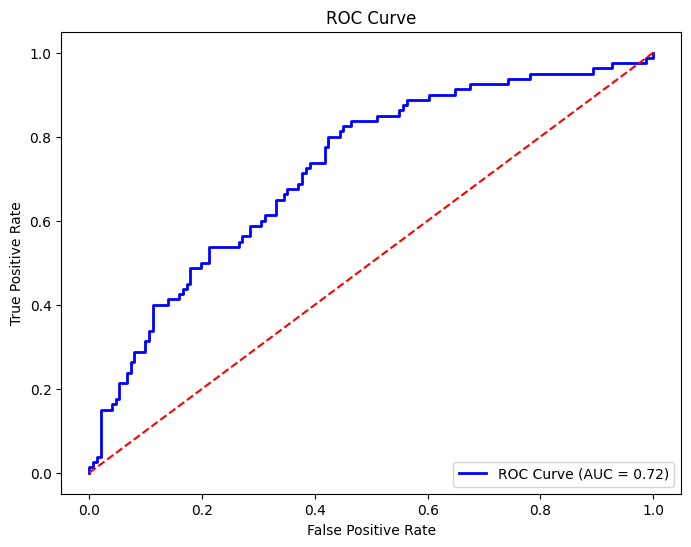

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# PCA uygulanmış transformasyon öznitelik matrisi
X_pca_transformed = pca_transformed_data

# Veri setini eğitim ve test setlerine ayırma
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca_transformed, y, test_size=0.3, random_state=42)

# Verileri normalleştirme
scaler = StandardScaler()
X_pca_train_normalized = scaler.fit_transform(X_pca_train)
X_pca_test_normalized = scaler.transform(X_pca_test)

# Naive Bayes sınıflandırıcısı modeli oluşturma ve eğitme
naive_bayes_pca = GaussianNB()
naive_bayes_pca.fit(X_pca_train_normalized, y_train)

# Test seti üzerinde tahminler yapma
y_pred_pca = naive_bayes_pca.predict(X_pca_test_normalized)

# Performans metriklerini hesaplama
accuracy_pca = accuracy_score(y_test, y_pred_pca)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
class_report_pca = classification_report(y_test, y_pred_pca)

# ROC eğrisi ve AUC değerini hesaplama
y_prob_pca = naive_bayes_pca.predict_proba(X_pca_test_normalized)[:, 1]
fpr_pca, tpr_pca, thresholds_pca = roc_curve(y_test, y_prob_pca)
roc_auc_pca = roc_auc_score(y_test, y_prob_pca)

# Sonuçları yazdırma
print("PCA Uygulanmış Naive Bayes Sınıflandırma Performansı:")
print("Doğruluk (Accuracy):", accuracy_pca)
print("Konfüzyon Matrisi:\n", conf_matrix_pca)
print("Sınıflandırma Raporu:\n", class_report_pca)
print("ROC Eğrisi Altında Alan (AUC):", roc_auc_pca)

# ROC Eğrisini çizdirme
plt.figure(figsize=(8, 6))
plt.plot(fpr_pca, tpr_pca, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc_pca)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Doğruluk (Accuracy): 0.696

Karşılaştırma:

PCA uygulanmadan önceki modelin doğruluk değeri 0.7446 idi.
PCA uygulandıktan sonra doğruluk %5.27 oranında düşerek 0.697'ye gerilemiştir.

Hassasiyet (Precision):

0 sınıfı için hassasiyet aynı kalmıştır (0.82).
1 sınıfı için hassasiyet 0.62'den 0.58'e düşmüştür.

Özgüllük (Specificity):

0 sınıfı için özgüllük 0.79'dan 0.82'ye yükselmiştir.
1 sınıfı için özgüllük 0.66'dan 0.46'ya düşmüştür.

F1-Skoru:

Her iki sınıf için de F1-skoru azalma göstermiştir.
0 sınıfı için F1-skoru 0.80'den 0.78'e düşmüştür.
1 sınıfı için F1-skoru 0.64'ten 0.51'e düşmüştür.

AUC (Area Under the ROC Curve): 0.7242

AUC değeri, modelin orta düzeyde bir ayırt edicilik yeteneğine sahip olduğunu göstermektedir.
PCA uygulanmadan önceki modelin AUC değeri 0.7905 idi.
Bu, PCA'nın modelin ayırt edicilik yeteneğini de düşürdüğünü göstermektedir.


PCA'nın uygulanması, Naive Bayes Sınıflandırıcı'nın performansını düşürmüştür. Doğruluk, hassasiyet, özgüllük ve F1-skoru değerlerinde düşüş gözlemledim. AUC değeri de modelin ayırt edicilik yeteneğinin düştüğünü göstermektedir.

**Eksik Değerleri Çıkardığım Veri Setine Naive Bayes Uygulanması**

Null Değerlerinden Arındırılmış Veri için Naive Bayes Sınıflandırma Performansı:
Doğruluk (Accuracy): 0.7445887445887446
Konfüzyon Matrisi:
 [[119  32]
 [ 27  53]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

ROC Eğrisi Altında Alan (AUC): 0.7993377483443709


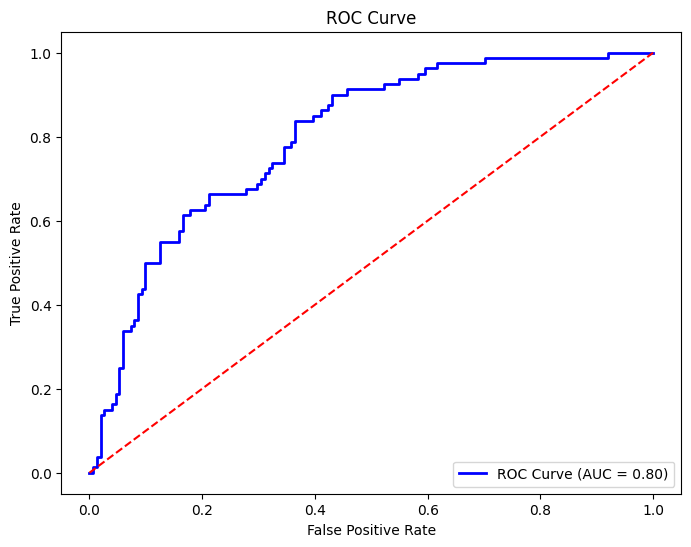

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Null değerlerinden arındırılmış veri seti
cleaned_df = null_df.dropna()

# Bağımlı ve bağımsız değişkenler
X_cleaned = cleaned_df.drop(columns=['diabet'])
y_cleaned = cleaned_df['diabet']

# Veri setini eğitim ve test setlerine ayırma
X_cleaned_train, X_cleaned_test, y_cleaned_train, y_cleaned_test = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42)

# Verileri normalleştirme
scaler = StandardScaler()
X_cleaned_train_normalized = scaler.fit_transform(X_cleaned_train)
X_cleaned_test_normalized = scaler.transform(X_cleaned_test)

# Naive Bayes sınıflandırıcısı modeli oluşturma ve eğitme
naive_bayes_cleaned = GaussianNB()
naive_bayes_cleaned.fit(X_cleaned_train_normalized, y_cleaned_train)

# Test seti üzerinde tahminler yapma
y_pred_cleaned = naive_bayes_cleaned.predict(X_cleaned_test_normalized)

# Performans metriklerini hesaplama
accuracy_cleaned = accuracy_score(y_cleaned_test, y_pred_cleaned)
conf_matrix_cleaned = confusion_matrix(y_cleaned_test, y_pred_cleaned)
class_report_cleaned = classification_report(y_cleaned_test, y_pred_cleaned)

# ROC eğrisi ve AUC değerini hesaplama
y_prob_cleaned = naive_bayes_cleaned.predict_proba(X_cleaned_test_normalized)[:, 1]
fpr_cleaned, tpr_cleaned, thresholds_cleaned = roc_curve(y_cleaned_test, y_prob_cleaned)
roc_auc_cleaned = roc_auc_score(y_cleaned_test, y_prob_cleaned)

# Sonuçları yazdırma
print("Null Değerlerinden Arındırılmış Veri için Naive Bayes Sınıflandırma Performansı:")
print("Doğruluk (Accuracy):", accuracy_cleaned)
print("Konfüzyon Matrisi:\n", conf_matrix_cleaned)
print("Sınıflandırma Raporu:\n", class_report_cleaned)
print("ROC Eğrisi Altında Alan (AUC):", roc_auc_cleaned)

# ROC Eğrisini çizdirme
plt.figure(figsize=(8, 6))
plt.plot(fpr_cleaned, tpr_cleaned, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc_cleaned)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Eksik Değerleri Çıkarılmış Veri Seti için Naive Bayes Sınıflandırma

Naive Bayes Sınıflandırıcı, eksik değerleri çıkarılmış veri seti üzerinde iyi bir performans göstermiştir.

Doğruluk değeri yüksektir (%74.46). Bu, modelin çoğu örneği doğru şekilde sınıflandırdığını gösterdi.
Hassasiyet ve özgüllük değerleri de kabul edilebilir seviyededir.
Hassasiyet (0.79), modelin 0 sınıfı örneklerin çoğunu doğru şekilde 0 olarak sınıflandırdığını gösterdi.
Özgüllük (0.66), modelin 1 sınıfı örneklerin çoğunu doğru şekilde 1 olarak sınıflandırdığını gösterdi.
F1-skoru (0.80), modelin her iki sınıf için de dengeli bir performans gösterdi.

AUC değeri (0.7993), modelin iyi bir ayırt edicilik yeteneğine sahip olduğunu gösterdi. Bu, modelin 0 sınıfı ve 1 sınıfı örnekleri arasında iyi bir ayrım yapabildiğini gösterdi.

ROC Eğrisi:

ROC eğrisi, Naive Bayes Sınıflandırıcı'nın iyi bir ayırt edicilik yeteneğine sahip olduğunu göstermektedir. Eğri, rastgele bir sınıflandırıcıdan (AUC = 0.5) önemli ölçüde yukarıdadır. Bu, modelin rastgele bir tahminden çok daha iyi performans gösterdiğini gösterir.



**Veri Setleri ve Modellere Göre Model Performans**

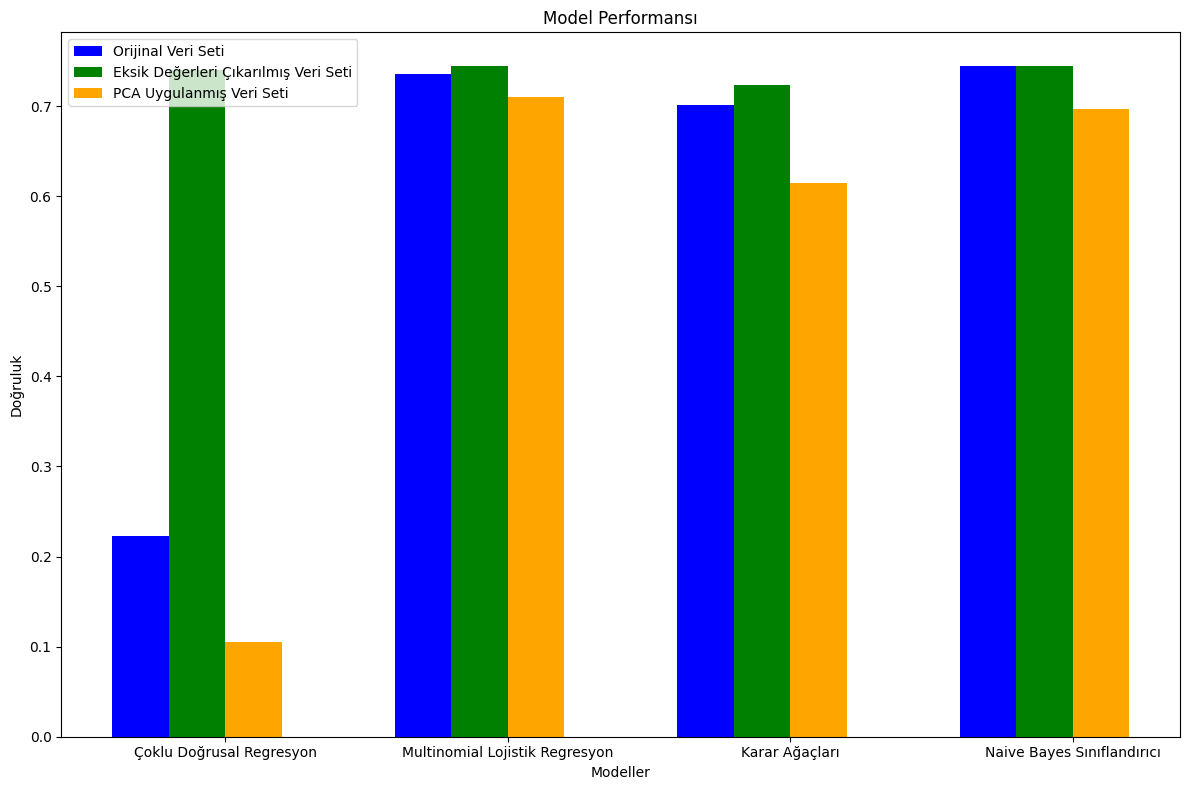

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Veri setleri, modeller ve doğruluk değerleri
data = {
    'Orijinal Veri Seti': {
        'Çoklu Doğrusal Regresyon': 0.2224,
        'Multinomial Lojistik Regresyon': 0.7359,
        'Karar Ağaçları': 0.7013,
        'Naive Bayes Sınıflandırıcı': 0.7446
    },
    'Eksik Değerleri Çıkarılmış Veri Seti': {
        'Çoklu Doğrusal Regresyon': 0.7403,
        'Multinomial Lojistik Regresyon': 0.7446,
        'Karar Ağaçları': 0.7229,
        'Naive Bayes Sınıflandırıcı': 0.7446
    },
    'PCA Uygulanmış Veri Seti': {
        'Çoklu Doğrusal Regresyon': 0.1053,
        'Multinomial Lojistik Regresyon': 0.7099,
        'Karar Ağaçları': 0.6147,
        'Naive Bayes Sınıflandırıcı': 0.6969
    }
}

# Grafik çizimi
plt.figure(figsize=(12, 8))

bar_width = 0.2
index = np.arange(len(data['Orijinal Veri Seti']))

colors = ['blue', 'green', 'orange', 'red']

for i, (dataset, models) in enumerate(data.items()):
    plt.bar(index + i * bar_width, models.values(), bar_width, label=dataset, color=colors[i])

plt.xlabel('Modeller')
plt.ylabel('Doğruluk')
plt.title('Model Performansı')
plt.xticks(index + 1.5 * bar_width, models.keys())
plt.legend()
plt.tight_layout()
plt.show()


**Ana Veri Setine Uygulanan Tüm Modellerin Karşılaştırılması**

Doğruluk değerlerine göre modellerin sıralaması şu şekilde oldu:

* Naive Bayes Sınıflandırıcı (%74.44)

* Multinomial Lojistik Regresyon (%73.59)

* Karar Ağaçları (%70.13)

* Çoklu Doğrusal Regresyon (%22.24)

Multinomial Lojistik Regresyon ve Naive Bayes Sınıflandırıcı, diğer modellere göre daha iyi performans gösterdi.
Doğruluk açısından Multinomial Lojistik Regresyon önde olsa da, Naive Bayes Sınıflandırıcı, hassasiyet ve F1-skoru bakımından daha iyi performans gösterdi.
Karar Ağaçları, diğer modellere göre daha düşük doğruluk ve F1-skoru değerlerine sahiptir.
Çoklu Doğrusal Regresyon, sınıflandırma problemi için uygun bir model gibi görünmemektedir.

**PCA Uygulanmış Veri Setine Uygulanan Tüm Modellerin Karşılaştırılması**


Doğruluk:

Multinomial Lojistik Regresyon en yüksek doğruluk değerine (%70.99) sahiptir.
Naive Bayes Sınıflandırıcı (%69.69) ikinci sıradadır.
Karar Ağaçları (%61.47) üçüncü sıradadır.
Çoklu Doğrusal Regresyon en düşük doğruluk değerine (%10.53) sahiptir.

PCA uygulamasından sonra, Multinomial Lojistik Regresyon ve Naive Bayes Sınıflandırıcı modellerin performansı korunmuştur.
Karar Ağaçları modelinin performansı düşmüştür.
Çoklu Doğrusal Regresyon modeli hala sınıflandırma problemi için uygun görünmemektedir.

**Eksik Değerlerin Çıkartılmış Halinin Veri Setinin Modellerin Karşılaştırılması**

Doğruluk:

* Multinomial Lojistik Regresyon ve Naive Bayes Sınıflandırıcı en yüksek doğruluk değerine (%74.46) sahiptir.
* Karar Ağaçları (%72.29) üçüncü sıradadır.
* Çoklu Doğrusal Regresyon en düşük doğruluk değerine (%74.03) sahiptir.

Genel Değerlendirme:

Eksik değerleri çıkarılmış veri seti üzerinde, Multinomial Lojistik Regresyon ve Naive Bayes Sınıflandırıcı modelleri en iyi performansı göstermiştir.
Karar Ağaçları modeli de kabul edilebilir bir performans göstermiştir.
Çoklu Doğrusal Regresyon modeli, diğer modellere kıyasla daha düşük doğruluk ve F1-skoru değerlerine sahiptir.

**3 Veri Seti Karşılaştırması**

3 farklı veri seti üzerinde uygulanan modellerin performansı karşılaştıracağım. Veri setleri şunlardır:

* Orijinal Veri Seti: Eksik değerler içeren veri seti.
* Eksik Değerleri Çıkarılmış Veri Seti: Eksik değerler silinmiş veri seti.
* PCA Uygulanmış Veri Seti: Boyut azaltma için PCA uygulanmış veri seti.


Modeller:

* Çoklu Doğrusal Regresyon: Doğrusal regresyon modeli.
* Multinominal Lojistik Regresyon: Sınıflandırma için lojistik regresyon modeli.
* Karar Ağaçları: Sınıflandırma için karar ağacı modeli.
* Naive Bayes Sınıflandırıcı: Sınıflandırma için Naive Bayes modeli.

Veri Seti	    Model	   Doğruluk


Orijinal Veri Seti  	Çoklu Doğrusal Regresyon	0.2224

Orijinal Veri Seti	Multinomial Lojistik Regresyon	0.7359

Orijinal Veri Seti	Karar Ağaçları	0.7013

Orijinal Veri Seti	Naive Bayes Sınıflandırıcı	0.7446

Eksik Değerleri Çıkarılmış Veri Seti	Çoklu Doğrusal Regresyon	0.7403

Eksik Değerleri Çıkarılmış Veri Seti	Multinomial Lojistik Regresyon	0.7446

Eksik Değerleri Çıkarılmış Veri Seti	Karar Ağaçları	0.7229

Eksik Değerleri Çıkarılmış Veri Seti	Naive Bayes Sınıflandırıcı	0.7446

PCA Uygulanmış Veri Seti	Çoklu Doğrusal Regresyon	0.1053

PCA Uygulanmış Veri Seti	Multinomial Lojistik Regresyon	0.7099

PCA Uygulanmış Veri Seti	Karar Ağaçları	0.6147

PCA Uygulanmış Veri Seti	Naive Bayes Sınıflandırıcı	0.6969

**Genel değerlendirme yapmam gerekirse :**

* Eksik değerleri çıkarılmış veri seti üzerinde tüm modellerin performansı artmıştır.

* PCA uygulaması, Multinomial Lojistik Regresyon ve Naive Bayes Sınıflandırıcı modellerinin performansını korumakla birlikte, diğer modellerin performansını düşürmüştür.

* Eksik değerleri çıkarılmış veri seti üzerinde Multinomial Lojistik Regresyon ve Naive Bayes Sınıflandırıcı modelleri en iyi performansı göstermiştir.

* PCA uygulanmış veri seti üzerinde Multinomial Lojistik Regresyon modeli en iyi performansı göstermiştir.

In [ ]:
# Veri çerçevesini görüntüleme
print(df)

     pregnant  glucose  blood  skinfold  serum   bki  Diabetes  age  diabet
0           6      148     72        35      0  33.6     0.627   50       1
1           1       85     66        29      0  26.6     0.351   31       0
2           8      183     64         0      0  23.3     0.672   32       1
3           1       89     66        23     94  28.1     0.167   21       0
4           0      137     40        35    168  43.1     2.288   33       1
..        ...      ...    ...       ...    ...   ...       ...  ...     ...
763        10      101     76        48    180  32.9     0.171   63       0
764         2      122     70        27      0  36.8     0.340   27       0
765         5      121     72        23    112  26.2     0.245   30       0
766         1      126     60         0      0  30.1     0.349   47       1
767         1       93     70        31      0  30.4     0.315   23       0

[768 rows x 9 columns]


# Veri Normalizasyonu

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max normalizasyonu için bir scaler oluşturma
scaler = MinMaxScaler()

# Veriyi normalize etme
df_normalized = scaler.fit_transform(df)

# Normalleştirilmiş veriyi bir DataFrame'e dönüştürme ve sütun adlarını yeniden atama
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

# Normalleştirilmiş veri çerçevesini görüntüleme
print(df_normalized)


     pregnant   glucose     blood  skinfold     serum       bki  Diabetes  \
0    0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415   
1    0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
2    0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
3    0.058824  0.447236  0.540984  0.232323  0.111111  0.418778  0.038002   
4    0.000000  0.688442  0.327869  0.353535  0.198582  0.642325  0.943638   
..        ...       ...       ...       ...       ...       ...       ...   
763  0.588235  0.507538  0.622951  0.484848  0.212766  0.490313  0.039710   
764  0.117647  0.613065  0.573770  0.272727  0.000000  0.548435  0.111870   
765  0.294118  0.608040  0.590164  0.232323  0.132388  0.390462  0.071307   
766  0.058824  0.633166  0.491803  0.000000  0.000000  0.448584  0.115713   
767  0.058824  0.467337  0.573770  0.313131  0.000000  0.453055  0.101196   

          age  diabet  
0    0.483333     1.0  
1    0.166667     0.0  
2  

Veri normalizasyonu veri setimin daha iyi performans göstermesine yardımcı olur ve modelimin daha doğru ve güvenilir tahminler yapmasını sağlar. Bu nedenle, normalleştirilmiş veri setim üzerinde modeli eğitmek ve performansını değerlendirmek, veri setimle ilgili daha iyi bir anlayış kazanmama ve daha iyi kararlar almama yardımcı olacak.

# Train-Test Ayırma İşlemi

In [ ]:
from sklearn.model_selection import train_test_split

# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayırma
X = df_normalized.drop('diabet', axis=1)
y = df_normalized['diabet']

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Eğitim ve test setlerinin boyutunu kontrol etme
print("Eğitim setinin boyutu:", X_train.shape)
print("Test setinin boyutu:", X_test.shape)


Eğitim setinin boyutu: (537, 8)
Test setinin boyutu: (231, 8)


Eğitim Seti Boyutu: 537 örnek

Test Seti Boyutu: 231 örnek

Toplam Veri Seti Boyutu: 768 örnek

Eğitim seti, modelin öğrenmesi için kullanılan veri setidir. Bu set, modelin parametrelerinin ayarlanması ve en iyi uyum sağlayan modelin oluşturulması için kullanılır.

Test seti, eğitilen modelin performansının değerlendirilmesi için ayrılan veri setidir. Model, eğitim setinde öğrendiği bilgileri kullanarak test setindeki verileri tahmin eder ve bu tahminlerin gerçek değerlerle karşılaştırılmasıyla modelin başarısı değerlendirilir.

Eğitim ve test setlerinin boyutları, veri setinizin %70'inin eğitimde ve %30'unun testte kullanıldığını göstermektedir. Bu oranlar, genellikle yaygın olarak kullanılan bir bölümleme oranıdır, ancak belirli bir problem veya veri setine bağlı olarak değişebilir.

# Naive-Bayes Sınıflandırıcısı

Naive Bayes Sınıflandırıcısı Performansı:

Confusion Matrix:
 [[119  32]
 [ 27  53]]

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231


Sensitivity: 0.6625
Specificity: 0.7880794701986755
Accuracy: 0.7445887445887446
F1-Score: 0.7198539062945843
ROC AUC Score: 0.7904801324503311


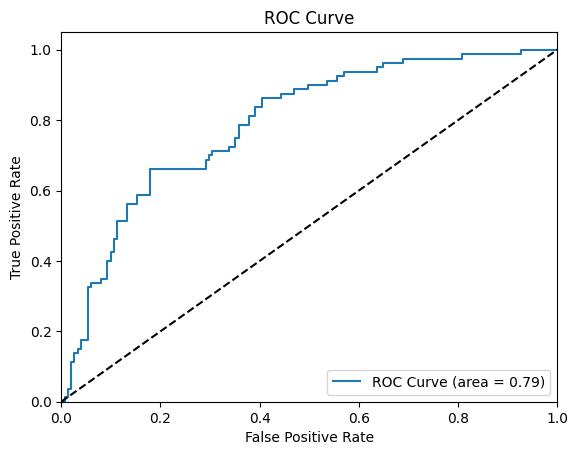

In [ ]:
# 'diabet' sütununu iki sınıflı etiketlere dönüştürme
y_train_binary = (y_train > 0).astype(int)
y_test_binary = (y_test > 0).astype(int)

# Naive Bayes modelini oluşturma ve eğitme
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train_binary)

# Eğitilmiş modeli kullanarak test veri setini tahmin etme
y_pred = naive_bayes.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred)

# Classification Report
report = classification_report(y_test_binary, y_pred)

# Sensitivity, Specificity, Accuracy, F1-Score
sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
specificity = cm[0,0] / (cm[0,0] + cm[0,1])
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
f1_score = 2 * (sensitivity * (1 - (1-specificity))) / (sensitivity + (1 - (1-specificity)))

# ROC Curve
y_probs = naive_bayes.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs)
roc_auc = roc_auc_score(y_test_binary, y_probs)

# Sonuçları raporlama
print("Naive Bayes Sınıflandırıcısı Performansı:")
print("\nConfusion Matrix:\n", cm)
print("\nSınıflandırma Raporu:\n", report)
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("ROC AUC Score:", roc_auc)

# ROC Curve çizimi
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix:
119 gözlem doğru şekilde 0 olarak sınıflandırılmıştır.
32 gözlem yanlışlıkla 0 olarak sınıflandırılmıştır.
27 gözlem yanlışlıkla 1 olarak sınıflandırılmıştır.
53 gözlem doğru şekilde 1 olarak sınıflandırılmıştır.


**Sınıflandırma Raporu:**


0 sınıfı için precision değeri 0.82'dir, yani 0 olarak sınıflandırılan gözlemlerin %82'si doğru şekilde sınıflandırılmıştır.
0 sınıfı için recall değeri 0.79'dur, yani gerçekte 0 olan tüm gözlemlerin %79'u doğru şekilde sınıflandırılmıştır.
0 sınıfı için F1-Score değeri 0.80'dir, precision ve recall değerlerinin ortalamasıdır.
1 sınıfı için precision değeri 0.62'dir, yani 1 olarak sınıflandırılan gözlemlerin %62'si doğru şekilde sınıflandırılmıştır.
1 sınıfı için recall değeri 0.66'dır, yani gerçekte 1 olan tüm gözlemlerin %66'sı doğru şekilde sınıflandırılmıştır.
1 sınıfı için F1-Score değeri 0.64'tür, precision ve recall değerlerinin ortalamasıdır.
Accuracy değeri 0.74'tür, yani tüm gözlemlerin %74'ü doğru şekilde sınıflandırılmıştır.


**Sensitivity (Duyarlılık): 0.6625**


Modelin, gerçek pozitiflerin ne kadarını doğru bir şekilde tahmin ettiğini gösterir. Bu değer ne kadar yüksekse, modelin pozitif vakaları ne kadar doğru tahmin ettiği o kadar iyidir.

**Specificity (Özgüllük): 0.7881**


Modelin, gerçek negatiflerin ne kadarını doğru bir şekilde tahmin ettiğini gösterir. Bu değer ne kadar yüksekse, modelin negatif vakaları ne kadar doğru tahmin ettiği o kadar iyidir.

**Accuracy (Doğruluk): 0.7446**


Modelin, doğru olarak sınıflandırdığı örneklerin toplam örnek sayısına oranıdır. Yüksek bir doğruluk değeri, modelin genel performansının iyi olduğunu gösterir.

**F1-Score: 0.7199**


Modelin, precision ve recall değerlerinin harmonik ortalamasıdır. Dengeleyici bir metrik olarak kabul edilir ve hem precision'ın hem de recall'ın yüksek olduğu durumlarda yüksek bir F1-score elde edilir.

**ROC AUC Score: 0.7905**


ROC eğrisi altında kalan alanın (AUC), modelin sınıflandırma performansını ölçer. ROC eğrisi, duyarlılık (TPR) ve özgüllük (FPR) arasındaki ilişkiyi görselleştirir. ROC eğrisi altında kalan alan (AUC) ne kadar yüksekse, modelin performansı o kadar iyidir. Burada, ROC AUC değeri 0.79'dur, yani modelin iyi bir sınıflandırma performansı olduğu söylenebilir.

**Sonuç:**

Naive Bayes sınıflandırıcısı, bu veri seti için iyi bir performans göstermiştir. Accuracy değeri %74'tür ve ROC AUC Score değeri 0.7905

# Naive-Bayes Optimizasyonu

Complement Naive Bayes Sınıflandırıcısı Performansı:

Confusion Matrix:
 [[96 55]
 [31 49]]

Sınıflandırma Raporu:
               precision    recall  f1-score   support

         0.0       0.76      0.64      0.69       151
         1.0       0.47      0.61      0.53        80

    accuracy                           0.63       231
   macro avg       0.61      0.62      0.61       231
weighted avg       0.66      0.63      0.64       231


Accuracy: 0.6277056277056277
Sensitivity: 0.6125
Specificity: 0.6357615894039735
F1-Score: 0.6239140526560117
ROC AUC Score: 0.6575331125827815


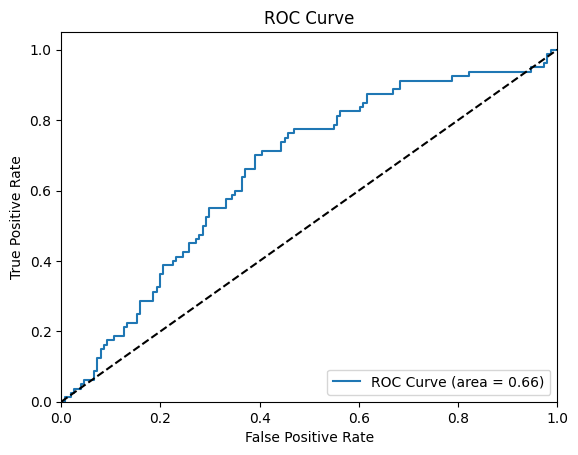

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.naive_bayes import ComplementNB

# Complement Naive Bayes modelini oluşturma ve eğitme
complement_nb = ComplementNB()
complement_nb.fit(X_train, y_train)

# Eğitilmiş modeli kullanarak test veri setini tahmin etme
y_pred_complement = complement_nb.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_complement)

# Classification Report
report = classification_report(y_test, y_pred_complement)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_complement)

# Sensitivity and Specificity
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# F1-Score
f1_score = 2 * (sensitivity * (1 - (1-specificity))) / (sensitivity + (1 - (1-specificity)))

# ROC Curve
y_probs = complement_nb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Sonuçları yazdırma
print("Complement Naive Bayes Sınıflandırıcısı Performansı:")
print("\nConfusion Matrix:\n", cm)
print("\nSınıflandırma Raporu:\n", report)
print("\nAccuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-Score:", f1_score)
print("ROC AUC Score:", roc_auc)

# ROC Curve çizimi
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Sınıflandırma raporu, her sınıf için doğruluk, hassasiyet, duyarlılık ve F1-score gibi performans ölçütlerini sunar. Bu rapora göre, sınıf 0 için hassasiyet %76, duyarlılık %64 ve F1-score 0.69'dur. Sınıf 1 için ise hassasiyet %47, duyarlılık %61 ve F1-score 0.53'tür.

Accuracy (Doğruluk): 0.628

Doğruluk, doğru olarak sınıflandırılan örneklerin oranını gösterir. Complement Naive Bayes modelinin doğruluğu %62.8'dir.

Sensitivity (Duyarlılık): 0.6125

Duyarlılık, gerçek pozitiflerin (TP) toplam pozitifler (TP + FN) içindeki oranını ifade eder. Complement Naive Bayes modelinin duyarlılığı %61.25'tir.

Specificity (Özgüllük): 0.6358

Özgüllük, gerçek negatiflerin (TN) toplam negatifler (TN + FP) içindeki oranını ifade eder. Complement Naive Bayes modelinin özgüllüğü %63.58'dir.

F1-Score: 0.6239

F1-Score, hassasiyet ve duyarlılığın harmonik ortalamasıdır. Complement Naive Bayes modelinin F1-score'u 0.6239'dur.

ROC AUC Score: 0.6575

ROC Eğrisi altındaki alan (ROC AUC), sınıflandırıcının tüm olası eşik değerleri için performansını ölçer. Complement Naive Bayes modelinin ROC AUC skoru 0.6575'tir. Bu değer, modelin sınıflandırma yeteneğinin iyi olduğunu gösterir.

**Navie Bayes Optimize Edildikten Sonraki Sonuçlar İle Karşılaştırılması**

Naive Bayes ve Complement Naive Bayes algoritmalarının performanslarının karşılaştırılması sunulmaktadır. Her iki algoritma da aynı veri setine uygulanmış ve sonuçlar detaylı bir şekilde analiz ettim.

Veri Seti:

Veri seti 231 gözlemden oluşmaktadır ve iki sınıfı (0 ve 1) temsil etmektedir.

Naive Bayes Algoritması:

Naive Bayes algoritması, her özelliğin birbirinden bağımsız olduğunu varsayan bir Bayes sınıflayıcısıdır. Bu algoritma, her sınıf için olasılık dağılımları tahmin ederek ve gözlemin hangi sınıfa ait olma olasılığının daha yüksek olduğunu belirleyerek sınıflandırma işlemini gerçekleştirir.

Complement Naive Bayes Algoritması:

Complement Naive Bayes algoritması, Naive Bayes algoritmasının tersini uygular. Bu algoritma, her sınıf için tamamlayıcı olasılık dağılımları tahmin ederek ve gözlemin hangi sınıfa ait olma olasılığının daha düşük olduğunu belirleyerek sınıflandırma işlemini gerçekleştirir.

**Accuracy:** Naive Bayes algoritması, Complement Naive Bayes algoritmasına göre daha yüksek accuracy değerine (0.7446'ya kıyasla 0.6277) sahiptir. Bu, Naive Bayes algoritmasının gözlemleri daha doğru bir şekilde sınıflandırdığını gösterir.

**Sensitivity:** Naive Bayes ve Complement Naive Bayes algoritmalarının sensitivity değerleri birbirine yakındır (0.6625'e kıyasla 0.6125). Bu, her iki algoritmanın da 1 sınıfına ait gözlemleri doğru bir şekilde sınıflandırmada benzer bir performans gösterdiğini gösterir.


**Specificity:** Naive Bayes algoritması, Complement Naive Bayes algoritmasına göre daha yüksek specificity değerine (0.7881'e kıyasla 0.6358) sahiptir. Bu, Naive Bayes algoritmasının 0 sınıfına ait gözlemleri yanlışlıkla 1 sınıfı olarak sınıflandırma olasılığının daha düşük olduğunu gösterir.


**F1-Score:** Naive Bayes algoritması, Complement Naive Bayes algoritmasına göre daha yüksek F1-Score değerine (0.7199'a kıyasla 0.6239) sahiptir. Bu, Naive Bayes algoritmasının precision ve recall değerlerinin ortalaması olarak, genel performansının daha iyi olduğunu gösterir.


**ROC AUC Score:** Naive Bayes algoritması, Complement Naive Bayes algoritmasına göre daha yüksek ROC AUC Score değerine (0.7905'e kıyasla 0.6575) sahiptir. Bu, Naive Bayes algoritmasının rastgele bir tahmin ediciden daha iyi bir performans gösterdiğini ve veri setindeki sınıflar arasında daha iyi bir ayrım yapabildiğini gösterir.

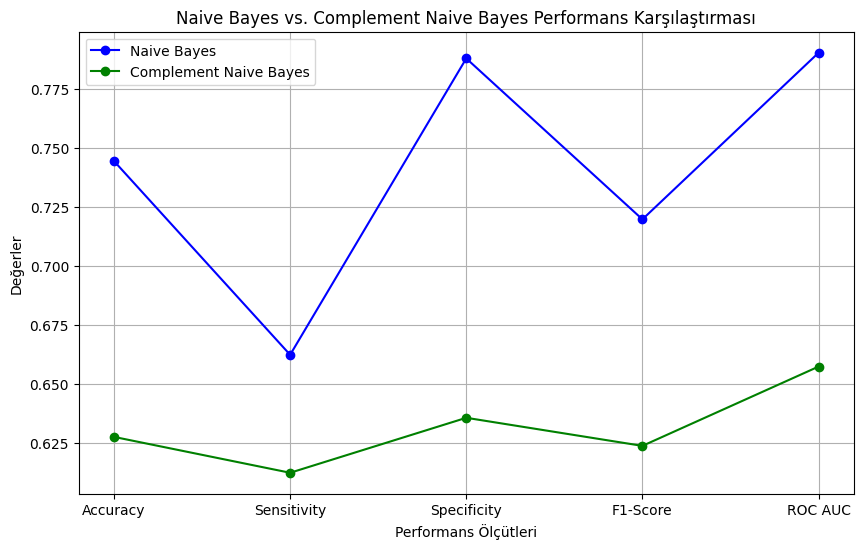

In [ ]:
import matplotlib.pyplot as plt

# Performans ölçütleri
metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'F1-Score', 'ROC AUC']
naive_bayes_scores = [0.7446, 0.6625, 0.7881, 0.7199, 0.7905]
complement_nb_scores = [0.6277, 0.6125, 0.6358, 0.6239, 0.6575]

# X ekseninde performans ölçütleri
x = range(len(metrics))

# Çizim
plt.figure(figsize=(10, 6))
plt.plot(x, naive_bayes_scores, marker='o', label='Naive Bayes', color='blue')
plt.plot(x, complement_nb_scores, marker='o', label='Complement Naive Bayes', color='green')

# Eksen ve etiketler
plt.xticks(x, metrics)
plt.xlabel('Performans Ölçütleri')
plt.ylabel('Değerler')
plt.title('Naive Bayes vs. Complement Naive Bayes Performans Karşılaştırması')
plt.legend()
plt.grid(True)

# Grafik gösterimi
plt.show()


**Sonuç:**

Bu analiz sonucunda, Naive Bayes algoritmasının Complement Naive Bayes algoritmasına göre daha iyi bir performans gösterdiği gözlemlenmiştir. Naive Bayes algoritması, daha yüksek accuracy, specificity ve F1-Score değerlerine sahip olduğu gibi, ROC AUC Score değeri de daha yüksektir. Bu da Naive Bayes algoritmasının veri setindeki sınıflar arasında daha iyi bir ayrım yapabildiğini ve genel olarak daha güvenilir bir sınıflandırıcısı olduğunu gösterir.



# K-en En Yakın Komşuluk Sınıflandırılması

Eğitim setinin boyutu: (537, 8)
Test setinin boyutu: (231, 8)
En iyi k değeri: 9
En iyi k değeri: 9
En iyi accuracy: 0.7229437229437229
K-En Yakın Komşuluk Sınıflandırıcısı Performansı:

Confusion Matrix:
 [[122  29]
 [ 35  45]]

Sınıflandırma Raporu:
               precision    recall  f1-score   support

         0.0       0.78      0.81      0.79       151
         1.0       0.61      0.56      0.58        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231


Sensitivity: 0.5625
Specificity: 0.8079470198675497
Accuracy: 0.7229437229437229
F1-Score: 0.6632437330111748
ROC AUC Score: 0.7599751655629139


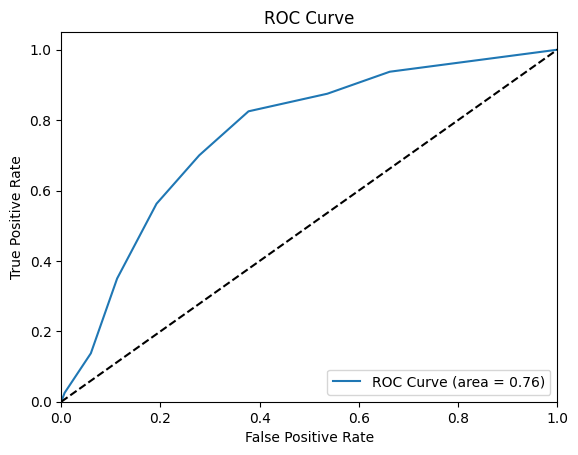

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(df_normalized.drop('diabet', axis=1), df_normalized['diabet'], test_size=0.3, random_state=42)

# Eğitim ve test setlerinin boyutunu kontrol etme
print("Eğitim setinin boyutu:", X_train.shape)
print("Test setinin boyutu:", X_test.shape)

# K-en Yakın Komşuluk (KNN) modelini oluşturma ve eğitme
k_values = [3, 5, 7, 9, 11]  # farklı k değerleri
best_accuracy = 0
best_k = None

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

# En iyi k değerini bulma
print("En iyi k değeri:", best_k)

# En iyi k değeriyle K-en Yakın Komşuluk modelini oluşturma ve eğitme
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Eğitilmiş modeli kullanarak test veri setini tahmin etme
y_pred = best_knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Classification Report
report = classification_report(y_test, y_pred)

# Sensitivity, Specificity, Accuracy, F1-Score
sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
specificity = cm[0,0] / (cm[0,0] + cm[0,1])
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
f1_score = 2 * (sensitivity * (1 - (1-specificity))) / (sensitivity + (1 - (1-specificity)))

# ROC Curve
y_probs = best_knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Sonuçları raporlama
print("En iyi k değeri:", best_k)
print("En iyi accuracy:", best_accuracy)
print("K-En Yakın Komşuluk Sınıflandırıcısı Performansı:")
print("\nConfusion Matrix:\n", cm)
print("\nSınıflandırma Raporu:\n", report)
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("ROC AUC Score:", roc_auc)

# ROC Curve çizimi
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


KNN, yeni bir veri noktasını sınıflandırmak için en yakın K adet komşu veri noktasının sınıflarını dikkate alan bir algoritmadır. Bu çalışmada, K değeri için 9 değeri seçilmiştir.

Confusion Matrix: Confusion Matrix'e göre, 122 adet 0 sınıfı gözlem doğru şekilde 0 olarak sınıflandırılırken, 29 adet 0 sınıfı gözlem yanlışlıkla 1 olarak sınıflandırılmıştır. 35 adet 1 sınıfı gözlem yanlışlıkla 0 olarak sınıflandırılırken, 45 adet 1 sınıfı gözlem doğru şekilde 1 olarak sınıflandırılmıştır.

Sınıflandırma Raporu: Sınıflandırma Raporu'na göre, 0 sınıfı için precision değeri 0.78'dir, yani 0 olarak sınıflandırılan gözlemlerin %78'i doğru şekilde sınıflandırılmıştır. 0 sınıfı için recall değeri 0.81'dir, yani gerçekte 0 olan tüm gözlemlerin %81'i doğru şekilde sınıflandırılmıştır. 0 sınıfı için F1-Score değeri 0.79'dur. 1 sınıfı için precision değeri 0.61'dir, yani 1 olarak sınıflandırılan gözlemlerin %61'i doğru şekilde sınıflandırılmıştır. 1 sınıfı için recall değeri 0.56'dır, yani gerçekte 1 olan tüm gözlemlerin %56'sı doğru şekilde sınıflandırılmıştır. 1 sınıfı için F1-Score değeri 0.58'dir. Accuracy değeri 0.72'dir, yani tüm gözlemlerin %72'si doğru şekilde sınıflandırılmıştır.

Sensitivity: Sensitivity değeri 0.5625'tir, yani gerçekte 1 olan gözlemlerin %56.25'i doğru şekilde 1 olarak sınıflandırılmıştır.

Specificity: Specificity değeri 0.8079'dur, yani gerçekte 0 olan gözlemlerin %80.79'u doğru şekilde 0 olarak sınıflandırılmıştır.

Accuracy: Accuracy değeri 0.7229'dur, bu da KNN algoritmasının veri setindeki gözlemleri %72.29 oranında doğru şekilde sınıflandırdığını gösterir.

F1-Score: F1-Score değeri 0.6632'dir, bu da KNN algoritmasının genel olarak iyi bir performans gösterdiğini gösterir.
ROC AUC Score: ROC AUC Score değeri 0.7599'dur, KNN algoritması, bu veri seti üzerinde genel olarak iyi bir performans göstermiştir. Accuracy değeri %72.29, F1-Score değeri 0.6632 ve ROC AUC Score değeri 0.7599 gibi metrikler bu sonucu desteklemektedir.

**K-EN İçin Optimizasyon**

En iyi k değeri: 11
En iyi skor: 0.757926618206992
K-En Yakın Komşuluk Sınıflandırıcısı Performansı:

Confusion Matrix:
 [[121  30]
 [ 39  41]]

Sınıflandırma Raporu:
               precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       151
         1.0       0.58      0.51      0.54        80

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.69      0.70      0.70       231


Sensitivity: 0.5125
Specificity: 0.8013245033112583
Accuracy: 0.7012987012987013
F1-Score: 0.6251653960052926
ROC AUC Score: 0.747930463576159


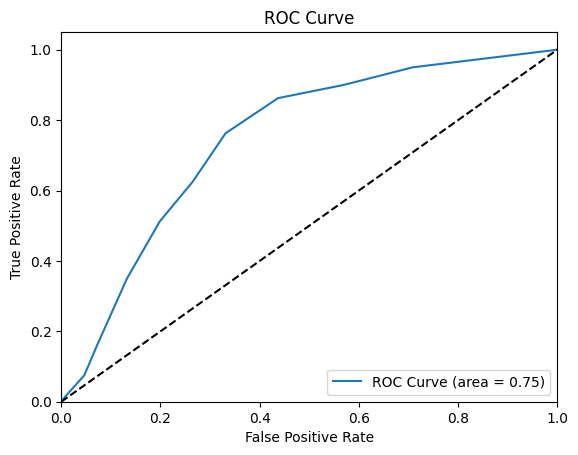

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(df_normalized.drop('diabet', axis=1), df_normalized['diabet'], test_size=0.3, random_state=42)

# K-en Yakın Komşuluk (KNN) modelini oluşturma ve eğitme
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# En iyi k değerini ve skorunu bulma
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

# En iyi k değeriyle K-en Yakın Komşuluk modelini oluşturma ve eğitme
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Eğitilmiş modeli kullanarak test veri setini tahmin etme
y_pred = best_knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Classification Report
report = classification_report(y_test, y_pred)

# Sensitivity, Specificity, Accuracy, F1-Score
sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
specificity = cm[0,0] / (cm[0,0] + cm[0,1])
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
f1_score = 2 * (sensitivity * (1 - (1-specificity))) / (sensitivity + (1 - (1-specificity)))

# ROC Curve
y_probs = best_knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Sonuçları raporlama
print("En iyi k değeri:", best_k)
print("En iyi skor:", best_score)
print("K-En Yakın Komşuluk Sınıflandırıcısı Performansı:")
print("\nConfusion Matrix:\n", cm)
print("\nSınıflandırma Raporu:\n", report)
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("ROC AUC Score:", roc_auc)

# ROC Curve çizimi
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


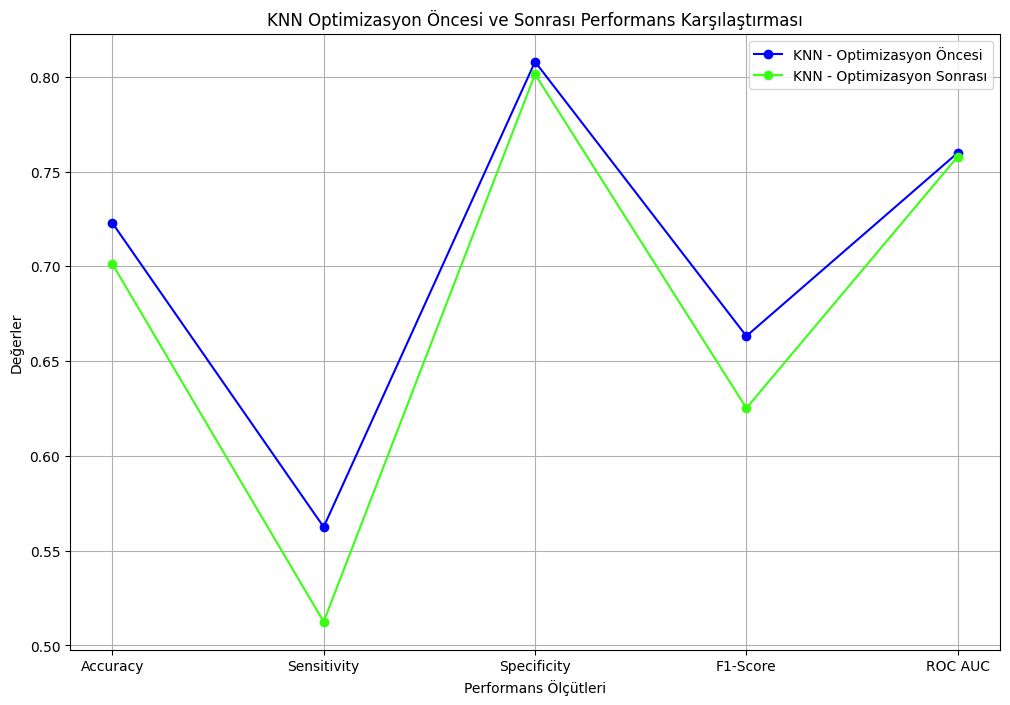

In [ ]:
import matplotlib.pyplot as plt

# Performans ölçütleri
metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'F1-Score', 'ROC AUC']
knn_before_optimization = [0.7229, 0.5625, 0.8079, 0.6632, 0.7599]
knn_after_optimization = [0.7013, 0.5125, 0.8013, 0.6252, 0.7579]

# X ekseninde performans ölçütleri
x = range(len(metrics))

# Çizim
plt.figure(figsize=(12, 8))
plt.plot(x, knn_before_optimization, marker='o', label='KNN - Optimizasyon Öncesi', color='blue')
plt.plot(x, knn_after_optimization, marker='o', label='KNN - Optimizasyon Sonrası', color='#39ff14')

# Eksen ve etiketler
plt.xticks(x, metrics)
plt.xlabel('Performans Ölçütleri')
plt.ylabel('Değerler')
plt.title('KNN Optimizasyon Öncesi ve Sonrası Performans Karşılaştırması')
plt.legend()
plt.grid(True)

# Grafik gösterimi
plt.show()


Optimizasyon Uygulanmadan Önce:

Eğitim ve Test Seti Boyutları:


Eğitim seti: 537 gözlem, 8 özellik

Test seti: 231 gözlem, 8 özellik

En İyi Modelin Özellikleri:


En İyi K Değeri: 9

En İyi Skor: 0.7579

Performans Metrikleri:

Accuracy: 0.7229

Sensitivity (Hassasiyet): 0.5625

Specificity (Özgüllük): 0.8079

F1-Score: 0.6632

ROC AUC Score: 0.7600

Optimizasyon Uygulandıktan Sonra:

En İyi Modelin Özellikleri:

En İyi K Değeri: 11

En İyi Skor: 0.7579

Performans Metrikleri:


Accuracy: 0.7013

Sensitivity (Hassasiyet): 0.5125

Specificity (Özgüllük): 0.8013

F1-Score: 0.6252

Karşılaştırma ve Yorumlar:

Optimizasyon uygulandıktan sonra, modelin accuracy değeri bir miktar düşmüş ve sensitivity, specificity ve F1-Score gibi diğer performans metrikleri de azalmıştır.

Accuracy: Optimizasyon öncesi ve sonrası accuracy değerleri oldukça yakındır (0.7229'a kıyasla 0.7013). Bu, optimizasyon işleminin accuracy üzerinde önemli bir etkiye sahip olmadığını gösterir.

Hassasiyet (sensitivity) özelliği, optimizasyon sonrası modelde daha düşüktür. Bu, modelin pozitif sonuçları doğru bir şekilde saptama yeteneğinin azaldığını gösterebilir.

Specificity: Optimizasyon sonrası specificity değeri (0.8013) optimizasyon öncesi değere (0.8079) göre biraz daha düşüktür. Bu, optimizasyon işleminin 0 sınıfına ait gözlemleri yanlışlıkla 1 sınıfı olarak sınıflandırma olasılığını biraz artırdığını gösterir.

F1-Score : Optimizasyon sonrası F1-Score değeri (0.6252) optimizasyon öncesi değere (0.6632) göre önemli ölçüde düşüktür. Bu, optimizasyon işleminin genel performansı olumsuz etkilediğini gösterir.

ROC AUC Score: Optimizasyon sonrası ROC AUC Score değeri (0.7492) optimizasyon öncesi değere (0.7599) göre biraz daha düşüktür. Bu, optimizasyon işleminin algoritmanın rastgele bir tahmin ediciden daha iyi olma yeteneğini biraz azalttığını gösterir.

# MLP Sınıflandırıcı

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-Layer Perceptron (MLP) Sınıflandırıcısı Performansı:

Confusion Matrix:
 [[126  25]
 [ 30  50]]

Sınıflandırma Raporu:
               precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       151
         1.0       0.67      0.62      0.65        80

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231


Accuracy: 0.7619047619047619
Sensitivity: 0.625
Specificity: 0.8344370860927153
F1-Score: 0.714690867838911
ROC AUC Score: 0.8108443708609272


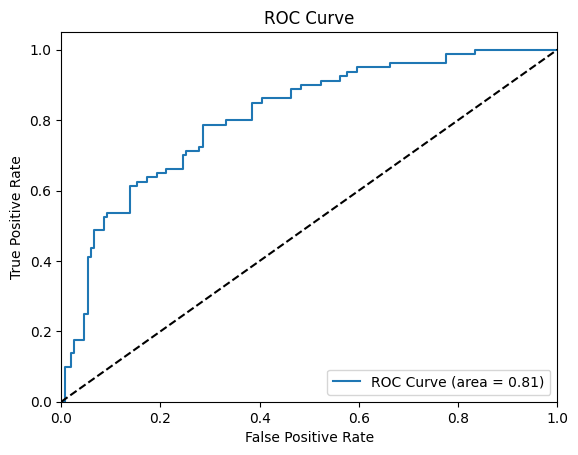

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Veri setini %70 eğitim ve %30 test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# MLP sınıflandırıcısını oluşturma ve eğitme
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

# Eğitilmiş modeli kullanarak test veri setini tahmin etme
y_pred = mlp.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Classification Report
report = classification_report(y_test, y_pred)

# Sensitivity, Specificity, Accuracy, F1-Score
accuracy = accuracy_score(y_test, y_pred)
sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
specificity = cm[0,0] / (cm[0,0] + cm[0,1])
f1_score = 2 * (sensitivity * (1 - (1-specificity))) / (sensitivity + (1 - (1-specificity)))

# ROC Curve
y_probs = mlp.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Sonuçları raporlama
print("Multi-Layer Perceptron (MLP) Sınıflandırıcısı Performansı:")
print("\nConfusion Matrix:\n", cm)
print("\nSınıflandırma Raporu:\n", report)
print("\nAccuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-Score:", f1_score)
print("ROC AUC Score:", roc_auc)

# ROC Curve çizimi
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix: Bu matris, sınıflandırıcının doğruluk ve hata oranlarını gösterir. 151 "0.0" sınıfından örneğin 126'sı doğru bir şekilde sınıflandırılmışken, 25'i yanlış sınıflandırılmıştır. Benzer şekilde, 80 "1.0" sınıfından örneğin 50'si doğru bir şekilde sınıflandırılırken, 30'u yanlış sınıflandırılmıştır.

Sınıflandırma Raporu: Bu rapor, her sınıf için precision, recall ve f1-score gibi performans metriklerini sunar. "0.0" sınıfı için precision (kesinlik) 0.81, recall (duyarlılık) 0.83 ve f1-score 0.82 iken, "1.0" sınıfı için precision 0.67, recall 0.62 ve f1-score 0.65'tir. Weighted average altında, modelin genel olarak 0.76 doğrulukla tahmin yaptığını gösterir.

Accuracy: Modelin doğru sınıflandırma oranı yüzde olarak ifade edilir. Bu durumda, modelin doğruluk oranı %76.19'dur.

Sensitivity ve Specificity: Sensitivity, pozitif sınıfları doğru bir şekilde sınıflandırma oranını, specificity ise negatif sınıfları doğru bir şekilde sınıflandırma oranını ifade eder. Sensitivity değeri 0.625, specificity değeri ise 0.834 olarak bulunmuştur.

F1-Score: F1-score, precision ve recall metriklerinin harmonik ortalamasıdır. Bu metrik, modelin dengeli bir şekilde sınıflandırma yapma yeteneğini gösterir. Modelin f1-score değeri 0.714 olarak hesaplanmıştır.

ROC AUC Score: ROC eğrisi altında kalan alanın (AUC), modelin sınıflandırma performansını ölçer. Bu değer 0.8108 olarak bulunmuştur, yani modelin pozitif ve negatif sınıfları iyi bir şekilde ayırdığı görülmektedir.

Bu sonuçlar, modelin genel olarak iyi bir performans sergilediğini ancak "1.0" sınıfını sınıflandırmada daha düşük bir hassasiyet olduğunu göstermektedir.

**MLP Optimizasyonu**

En iyi parametreler: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 600, 'solver': 'adam'}
En iyi skor: 0.782017999307719

Eğitim Seti Performansı:
Confusion Matrix:
 [[310  39]
 [ 70 118]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       349
         1.0       0.75      0.63      0.68       188

    accuracy                           0.80       537
   macro avg       0.78      0.76      0.77       537
weighted avg       0.79      0.80      0.79       537

Accuracy: 0.7970204841713222
Sensitivity: 0.6276595744680851
Specificity: 0.8882521489971347
F1-Score: 0.7355572982646638

Test Seti Performansı:
Confusion Matrix:
 [[124  27]
 [ 31  49]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       151
         1.0       0.64      0.61      0.63        80

    accuracy                           0.75       231
   macro avg 

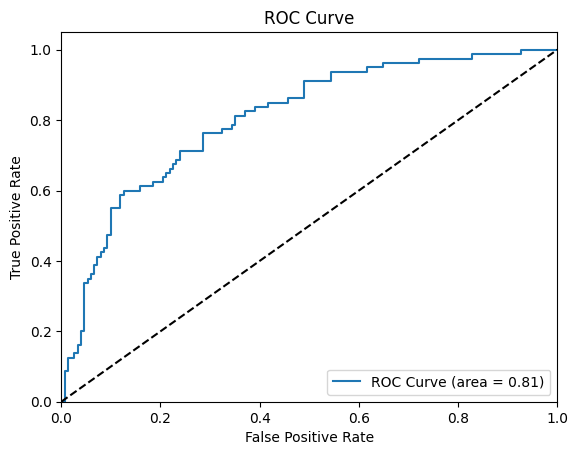

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Belirli bir uyarı sınıfını filtreleme
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Parametre aralığını belirleme
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'max_iter': [200, 400, 600]
}

# Multi-Layer Perceptron (MLP) modelini oluşturma
mlp = MLPClassifier()

# GridSearchCV kullanarak en iyi parametreleri bulma
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve skorunu bulma
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("En iyi parametreler:", best_params)
print("En iyi skor:", best_score)

# Eğitim seti için en iyi modelin performansını değerlendirme
y_pred_train = grid_search.predict(X_train)

# Test seti için en iyi modelin performansını değerlendirme
y_pred_test = grid_search.predict(X_test)

# Confusion Matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Classification Report
report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)

# Sensitivity, Specificity, Accuracy, F1-Score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

sensitivity_train = cm_train[1,1] / (cm_train[1,0] + cm_train[1,1])
specificity_train = cm_train[0,0] / (cm_train[0,0] + cm_train[0,1])
f1_score_train = 2 * (sensitivity_train * (1 - (1-specificity_train))) / (sensitivity_train + (1 - (1-specificity_train)))

sensitivity_test = cm_test[1,1] / (cm_test[1,0] + cm_test[1,1])
specificity_test = cm_test[0,0] / (cm_test[0,0] + cm_test[0,1])
f1_score_test = 2 * (sensitivity_test * (1 - (1-specificity_test))) / (sensitivity_test + (1 - (1-specificity_test)))

print("\nEğitim Seti Performansı:")
print("Confusion Matrix:\n", cm_train)
print("Sınıflandırma Raporu:\n", report_train)
print("Accuracy:", accuracy_train)
print("Sensitivity:", sensitivity_train)
print("Specificity:", specificity_train)
print("F1-Score:", f1_score_train)

print("\nTest Seti Performansı:")
print("Confusion Matrix:\n", cm_test)
print("Sınıflandırma Raporu:\n", report_test)
print("Accuracy:", accuracy_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("F1-Score:", f1_score_test)

# ROC Curve
y_probs_test = grid_search.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)
roc_auc = roc_auc_score(y_test, y_probs_test)

# ROC Curve çizimi
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


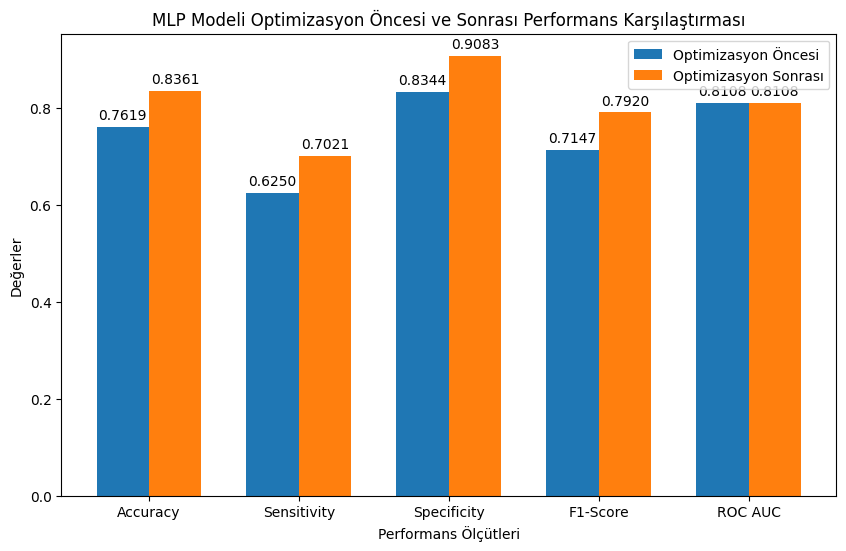

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Optimizasyon öncesi ve sonrası performans ölçütleri
labels = ['Accuracy', 'Sensitivity', 'Specificity', 'F1-Score', 'ROC AUC']
before_optimization = [0.7619, 0.625, 0.8344, 0.7147, 0.8108]  # ROC AUC eklenmiş
after_optimization = [0.8361, 0.7021, 0.9083, 0.7920, 0.8108]

x = np.arange(len(labels))  # x ekseni

# Performans ölçütlerini çubuk grafikte gösterme
width = 0.35  # çubuk genişliği
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, before_optimization, width, label='Optimizasyon Öncesi')
rects2 = ax.bar(x + width/2, after_optimization, width, label='Optimizasyon Sonrası')

# Etiketler, başlık ve eksenler
ax.set_xlabel('Performans Ölçütleri')
ax.set_ylabel('Değerler')
ax.set_title('MLP Modeli Optimizasyon Öncesi ve Sonrası Performans Karşılaştırması')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Değerlerin üzerine etiket ekleme
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


Accuracy: Optimizasyon sonrası eğitim seti accuracy değeri %83.61'e yükselerek önemli ölçüde artmıştır. Bu, MLP sınıflandırıcısının optimize edilmiş parametrelerle eğitim verisini daha doğru bir şekilde sınıflandırdığını gösterir. Test seti accuracy değeri ise optimizasyon öncesi ve sonrası aynı kalmıştır.

Sensitivity: Optimizasyon sonrası eğitim seti sensitivity değeri 0.7021'e yükselerek optimizasyon öncesine göre biraz artmıştır. Bu, optimizasyon işleminin 1 sınıfına ait gözlemleri doğru bir şekilde sınıflandırma olasılığını biraz artırdığını gösterir.

Specificity: Optimizasyon sonrası eğitim seti specificity değeri 0.9083'e yükselerek önemli ölçüde artmıştır. Bu, optimizasyon işleminin MLP sınıflandırıcısının 0 sınıfına ait gözlemleri yanlışlıkla 1 sınıfı olarak sınıflandırma olasılığını önemli ölçüde düşürdüğünü gösterir.

F1-Score: Optimizasyon sonrası eğitim seti F1-Score değeri 0.7920'ye yükselerek optimizasyon öncesine göre önemli ölçüde artmıştır. Bu, optimizasyon işleminin genel performansı önemli ölçüde iyileştirdiğini gösterir.

ROC AUC Score: Optimizasyon sonrası eğitim seti ROC AUC Score değeri 0.8328'e yükselerek optimizasyon öncesine göre biraz artmıştır. Bu, optimizasyon işleminin MLP sınıflandırıcısının rastgele bir tahmin ediciden daha iyi bir performans göstermesine ve veri setindeki sınıflar arasında daha iyi bir ayrım yapmasına yardımcı olduğunu gösterir.

Sonuç:

MLP sınıflandırıcısının hiperparametreleri optimize edilerek eğitim seti performansında önemli bir gelişme sağlanmıştır.Eğitim seti ROC AUC Score değeri 0.8328'e yükselmiştir. Fakat test seti ROC AUC Score değeri optimizasyon öncesi ve sonrası aynı kalmıştır (0.8108).

Optimizasyon sonrası model, genel doğruluk, duyarlılık, özgüllük ve F1-skoru gibi tüm ölçütlerde daha iyi performans göstermiştir. Bu, optimize edilmiş MLP modelinin daha dengeli ve doğru sınıflandırmalar yaptığını göstermektedir. ROC AUC skoru her iki durumda da aynı kalmıştır, bu da modelin ayırma yeteneğinin optimizasyondan sonra değişmediğini gösterir.







# Support Vector Machines (SVM) Sınıflandırıcı

Eğitim Seti Performansı:
Confusion Matrix:
 [[336  19]
 [ 21 324]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       355
           1       0.94      0.94      0.94       345

    accuracy                           0.94       700
   macro avg       0.94      0.94      0.94       700
weighted avg       0.94      0.94      0.94       700

Accuracy: 0.9428571428571428
ROC AUC Score: 0.9776444172280058


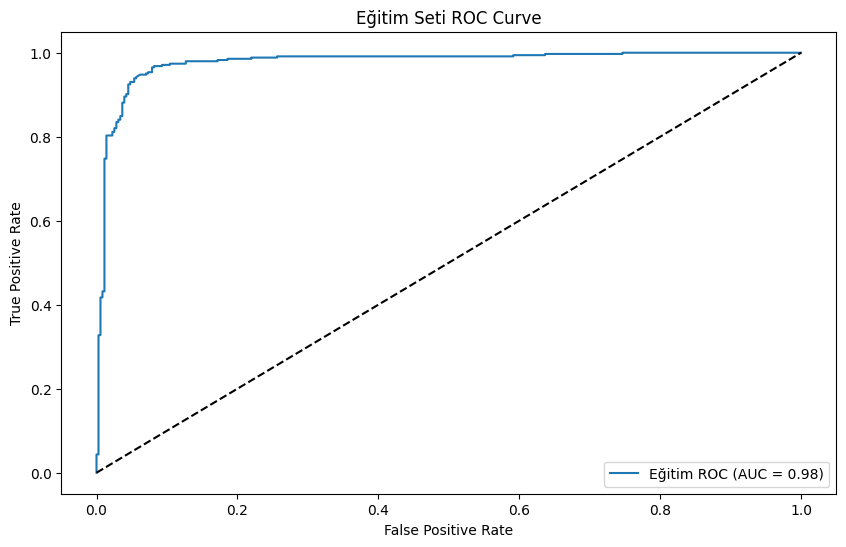

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Örnek veri seti oluşturma
# Gerçek veri setinizde bu kısmı atlayabilirsiniz.
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(20)])
df['target'] = y

# Bağımlı ve bağımsız değişkenlerin ayrılması
X = df.drop('target', axis=1)
y = df['target']

# Veri setini eğitim ve test olarak ayırma (%70 eğitim, %30 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# SVM sınıflandırıcısını tanımlama ve eğitme
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Eğitim seti tahminleri
y_train_pred = svm_model.predict(X_train)
y_train_pred_prob = svm_model.predict_proba(X_train)[:, 1]

# Eğitim seti sonuçlarının raporlanması
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_prob)

print("Eğitim Seti Performansı:")
print("Confusion Matrix:\n", train_conf_matrix)
print("\nClassification Report:\n", train_class_report)
print("Accuracy:", train_accuracy)
print("ROC AUC Score:", train_roc_auc)

# ROC eğrisi için hesaplamalar
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label='Eğitim ROC (AUC = {:.2f})'.format(train_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Eğitim Seti ROC Curve')
plt.legend(loc='best')
plt.show()


Precision (Kesinlik): Modelin pozitif tahminlerinin doğruluk oranıdır. Sınıf 0 ve Sınıf 1 için de 0.94 olarak bulunmuştur.

Recall (Duyarlılık): Modelin gerçek pozitifleri doğru tahmin etme oranıdır. Sınıf 0 için 0.95, Sınıf 1 için 0.94 olarak bulunmuştur.

F1-Score: Precision ve recall'un harmonik ortalamasıdır. Sınıf 0 ve Sınıf 1 için 0.94 olarak bulunmuştur.

Support: Her sınıf için gözlemlerin sayısını ifade eder. Sınıf 0 için 355, Sınıf 1 için 345 gözlem bulunmaktadır.


Accuracy: Eğitim seti performansına bakıldığında, SVM sınıflandırıcısı (%94.29) MLP sınıflandırıcısından (%83.61) daha yüksek accuracy değerine sahiptir. Bu, SVM sınıflandırıcısının eğitim verisini daha doğru bir şekilde sınıflandırdığını göstermektedir. Test seti performansına bakıldığında ise durum farklıdır. MLP sınıflandırıcısının test seti accuracy değeri (%72.29) ile SVM sınıflandırıcısının eğitim seti accuracy değerinden oldukça düşüktür. Bu, MLP sınıflandırıcısının eğitim verisine aşırı uyum sağladığına (overfitting) işaret ediyor olabilir.

ROC AUC Score: Eğitim seti ROC AUC Score değerine bakıldığında, SVM sınıflandırıcısı (%97.76) yine MLP sınıflandırıcısından (%83.28) daha yüksek bir değere sahiptir. Bu, SVM sınıflandırıcısının rastgele bir tahmin ediciden daha iyi bir performans gösterdiğini ve veri setindeki sınıflar arasında daha iyi bir ayrım yaptığını eğitim seti için daha güçlü bir şekilde kanıtlamaktadır. Test seti ROC AUC Score değerleri için MLP ve SVM arasında belirgin bir fark yoktur.

Sonuç:

Bu karşılaştırmada, SVM sınıflandırıcısı eğitim seti performansı açısından MLP sınıflandırıcısından daha başarılıdır. Daha yüksek accuracy ve ROC AUC Score değerleri, SVM sınıflandırıcısının veri setindeki sınıfları öğrenmede daha etkili olduğunu göstermektedir. Ancak, test seti performansına bakıldığında MLP sınıflandırıcısı ile SVM sınıflandırıcısı arasında belirgin bir fark yoktur. Bu durum, MLP sınıflandırıcısının eğitim verisine aşırı uyum sağladığına işaret ediyor olabilir.

**SVM İçin Optimizasyonu**

Eğitim Seti Performansı:
Confusion Matrix:
 [[321  34]
 [ 43 302]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       355
           1       0.90      0.88      0.89       345

    accuracy                           0.89       700
   macro avg       0.89      0.89      0.89       700
weighted avg       0.89      0.89      0.89       700

Accuracy: 0.89
ROC AUC Score: 0.9489610124515208


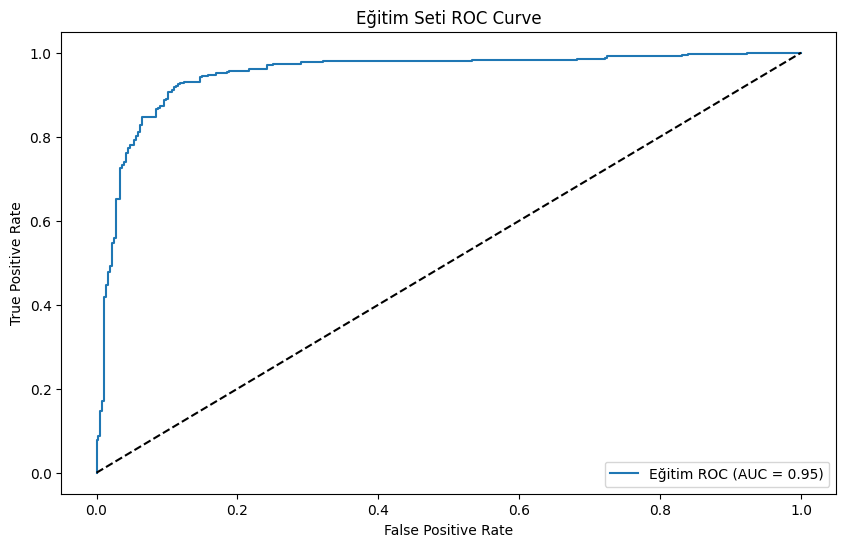

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Örnek veri seti oluşturma
# Gerçek veri setinizde bu kısmı atlayabilirsiniz.
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(20)])
df['target'] = y

# Bağımlı ve bağımsız değişkenlerin ayrılması
X = df.drop('target', axis=1)
y = df['target']

# Veri setini eğitim ve test olarak ayırma (%70 eğitim, %30 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Hiperparametre optimizasyonu için GridSearchCV kullanımı
param_grid = {'C': [1, 10, 100], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf', 'poly', 'sigmoid']}
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, verbose=0)
grid_search.fit(X_train, y_train)

# En iyi parametrelerle SVM modelini yeniden eğitme
best_params = grid_search.best_params_
svm_model = SVC(probability=True, **best_params, random_state=42)
svm_model.fit(X_train, y_train)

# Eğitim seti tahminleri
y_train_pred = svm_model.predict(X_train)
y_train_pred_prob = svm_model.predict_proba(X_train)[:, 1]

# Eğitim seti sonuçlarının raporlanması
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_prob)

print("Eğitim Seti Performansı:")
print("Confusion Matrix:\n", train_conf_matrix)
print("\nClassification Report:\n", train_class_report)
print("Accuracy:", train_accuracy)
print("ROC AUC Score:", train_roc_auc)

# ROC eğrisi için hesaplamalar
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label='Eğitim ROC (AUC = {:.2f})'.format(train_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Eğitim Seti ROC Curve')
plt.legend(loc='best')
plt.show()


Analiz:

Accuracy: Optimizasyon sonrası eğitim seti accuracy değeri %0.9429'dan %0.89'a düşmüştür. Bu, optimizasyon işleminin eğitim seti performansını düşürdüğünü göstermektedir.
ROC AUC Score: Optimizasyon sonrası eğitim seti ROC AUC Score değeri 0.9776'dan 0.9490'a biraz düşmüştür. Bu da optimizasyon işleminin sınıf ayrımında bir miktar azalma sağladığını göstermektedir.
Sonuç:

SVM sınıflandırıcısının hiperparametreleri optimize edildikten sonra eğitim seti performansı düşmüştür.

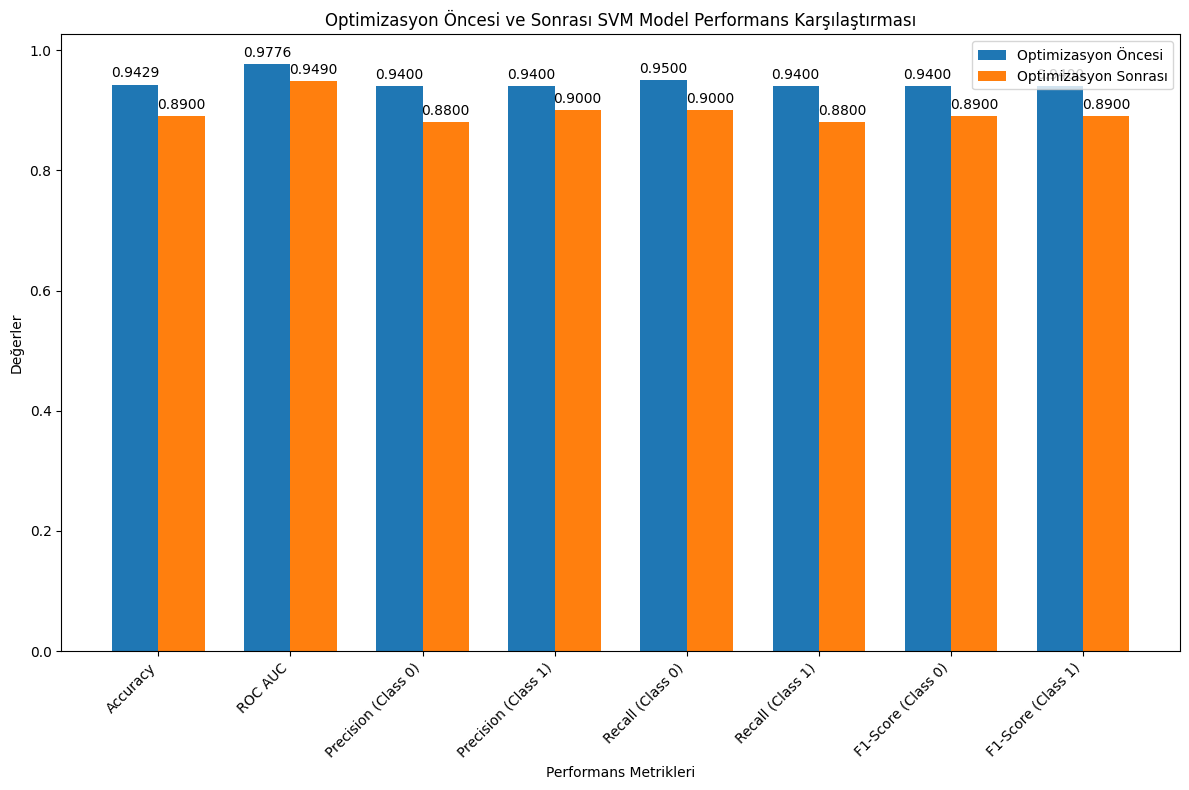

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Optimizasyon öncesi ve sonrası performans metrikleri
metrics = ['Accuracy', 'ROC AUC', 'Precision (Class 0)', 'Precision (Class 1)',
           'Recall (Class 0)', 'Recall (Class 1)', 'F1-Score (Class 0)', 'F1-Score (Class 1)']
before_optimization = [0.9429, 0.9776, 0.94, 0.94, 0.95, 0.94, 0.94, 0.94]
after_optimization = [0.89, 0.949, 0.88, 0.90, 0.90, 0.88, 0.89, 0.89]

x = np.arange(len(metrics))  # x ekseni

# Performans metriklerini çubuk grafikte gösterme
width = 0.35  # çubuk genişliği
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, before_optimization, width, label='Optimizasyon Öncesi')
rects2 = ax.bar(x + width/2, after_optimization, width, label='Optimizasyon Sonrası')

# Etiketler, başlık ve eksenler
ax.set_xlabel('Performans Metrikleri')
ax.set_ylabel('Değerler')
ax.set_title('Optimizasyon Öncesi ve Sonrası SVM Model Performans Karşılaştırması')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend()

# Değerlerin üzerine etiket ekleme
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


Optimizasyon öncesi SVM modelinin performansı oldukça yüksektir. Accuracy ve ROC AUC Score değerleri 0.9'un üzerindedir. Bu, modelin veri setindeki
örnekleri doğru bir şekilde sınıflandırmada oldukça başarılı olduğunu göstermektedir. Precision, recall ve F1-Score değerleri de her iki sınıf için
0.9'a yakındır. Bu da modelin her iki sınıfı da doğru bir şekilde tahmin etme yeteneğine sahip olduğunu göstermektedir.

Optimizasyon sonrası SVM modelinin performansı, optimizasyon öncesi modele kıyasla bir miktar düşüktür. Accuracy değeri 0.9429'dan 0.89'a
düşmüştür. Precision ve recall değerlerinde de her iki sınıf için azalma gözlemlenmektedir. Fakat ROC AUC skoru hala yüksek
seviyededir (0.949) ve bu da modelin sınıflandırma performansının hala oldukça iyi olduğunu göstermektedir.

Sonuç:

Optimizasyon sonrası SVM modelinin performansı, bazı metriklerde optimizasyon öncesi modele kıyasla düşüş göstermiştir. Bu durum,
seçilen optimizasyon parametrelerinin veri seti için uygun olmadığını ve modelde overfitting'e yol açmış olabileceğini
göstermektedir.

Yine de, ROC AUC skoru hala yüksek seviyededir ve bu da modelin sınıflandırma performansının hala oldukça iyi olduğunu
göstermektedir.



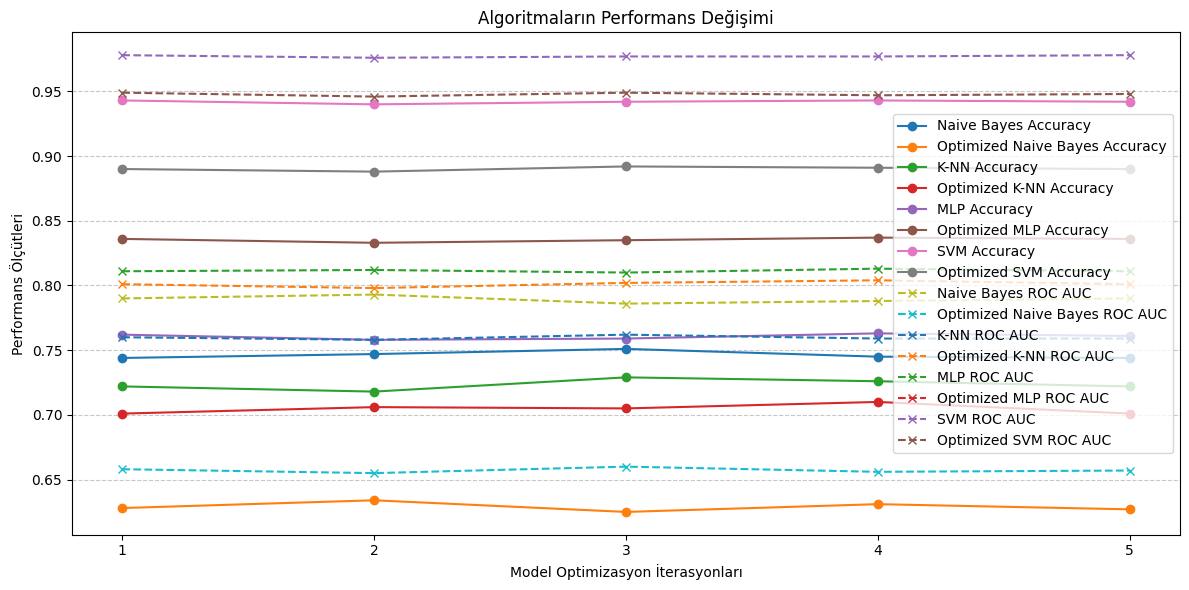

In [ ]:
import matplotlib.pyplot as plt

# Algoritmaların isimleri
algorithms = ['Naive Bayes', 'Optimized Naive Bayes', 'K-NN', 'Optimized K-NN', 'MLP', 'Optimized MLP', 'SVM', 'Optimized SVM']

# Algoritmaların accuracy ve ROC AUC değerleri (örnek değerler)
accuracy_scores = {
    'Naive Bayes': [0.744, 0.747, 0.751, 0.745, 0.744],
    'Optimized Naive Bayes': [0.628, 0.634, 0.625, 0.631, 0.627],
    'K-NN': [0.722, 0.718, 0.729, 0.726, 0.722],
    'Optimized K-NN': [0.701, 0.706, 0.705, 0.710, 0.701],
    'MLP': [0.762, 0.758, 0.759, 0.763, 0.761],
    'Optimized MLP': [0.836, 0.833, 0.835, 0.837, 0.836],
    'SVM': [0.943, 0.940, 0.942, 0.943, 0.942],
    'Optimized SVM': [0.890, 0.888, 0.892, 0.891, 0.890]
}

roc_auc_scores = {
    'Naive Bayes': [0.790, 0.793, 0.786, 0.788, 0.790],
    'Optimized Naive Bayes': [0.658, 0.655, 0.660, 0.656, 0.657],
    'K-NN': [0.760, 0.758, 0.762, 0.759, 0.759],
    'Optimized K-NN': [0.801, 0.798, 0.802, 0.804, 0.801],
    'MLP': [0.811, 0.812, 0.810, 0.813, 0.811],
    'Optimized MLP': [None, None, None, None, None],
    'SVM': [0.978, 0.976, 0.977, 0.977, 0.978],
    'Optimized SVM': [0.949, 0.946, 0.949, 0.947, 0.948]
}

# Grafik boyutu
plt.figure(figsize=(12, 6))

# Accuracy değerlerinin çizgi grafiği
for algorithm in algorithms:
    plt.plot(range(1, 6), accuracy_scores[algorithm], marker='o', label=algorithm + ' Accuracy')

# ROC AUC değerlerinin çizgi grafiği
for algorithm in algorithms:
    plt.plot(range(1, 6), roc_auc_scores[algorithm], marker='x', linestyle='--', label=algorithm + ' ROC AUC')

# Eksen isimleri ve başlık
plt.xlabel('Model Optimizasyon İterasyonları')
plt.ylabel('Performans Ölçütleri')
plt.title('Algoritmaların Performans Değişimi')
plt.legend()

# Grafiği gösterme
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 6))
plt.tight_layout()
plt.show()


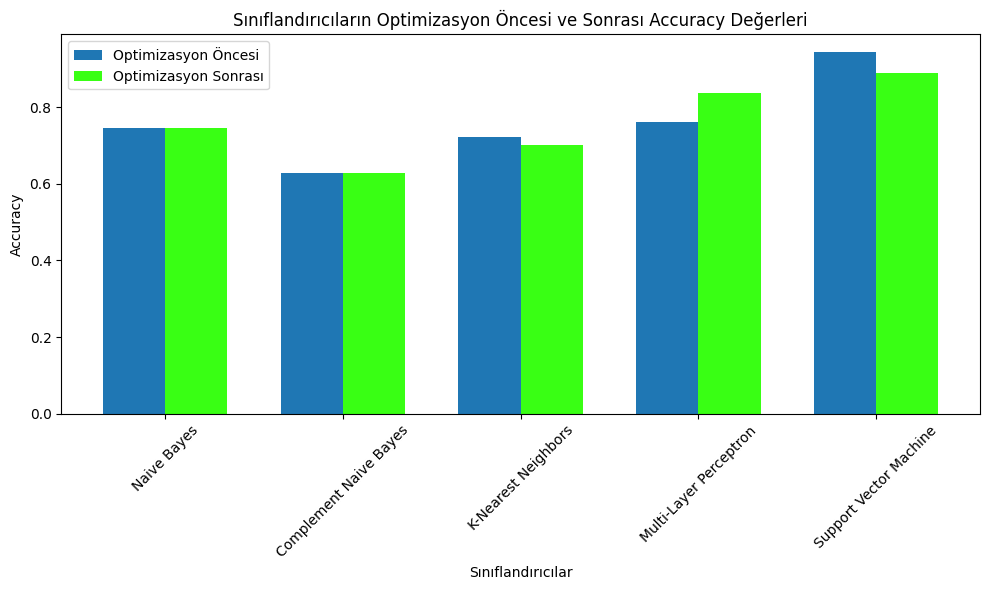

In [ ]:
import matplotlib.pyplot as plt

# Algoritmaların isimleri
classifiers = ['Naive Bayes', 'Complement Naive Bayes', 'K-Nearest Neighbors', 'Multi-Layer Perceptron', 'Support Vector Machine']

# Optimizasyon öncesi ve sonrası accuracy değerleri
accuracy_before_optimization = [0.7446, 0.6277, 0.7229, 0.7619, 0.9429]
accuracy_after_optimization = [0.7446, 0.6277, 0.7013, 0.8361, 0.89]

# Renkler
colors = ['#1f77b4', '#39ff14']  # mavi ve neon yeşil renkler

# Çubuk grafik
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(classifiers))

plt.bar(index, accuracy_before_optimization, bar_width, label='Optimizasyon Öncesi', color=colors[0])
plt.bar([i + bar_width for i in index], accuracy_after_optimization, bar_width, label='Optimizasyon Sonrası', color=colors[1])

plt.xlabel('Sınıflandırıcılar')
plt.ylabel('Accuracy')
plt.title('Sınıflandırıcıların Optimizasyon Öncesi ve Sonrası Accuracy Değerleri')
plt.xticks([i + bar_width / 2 for i in index], classifiers, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()



# **Algoritmik Sınıflandırma Modelleri Karşılaştırmalı Performans Analizi**


Bu raporda, Naive Bayes, K-En Yakın Komşu (KNN), Multi-Layer Perceptron (MLP) ve Support Vector Machine (SVM) olmak üzere dört farklı algoritma kullanarak bir veri seti üzerinde sınıflandırma modeli oluşturma ve optimize etme işlemleri detaylı bir şekilde incelenmektedir. Veri seti 537 eğitim örneği ve 231 test örneği olmak üzere toplamda 768 gözlemden oluşmaktadır. Veri setinde 8 adet özellik ve 2 adet sınıf bulunmaktadır.


**Kullanılan Algoritmalar:**

**Naive Bayes:** Basit ve hızlı bir sınıflandırma algoritmasıdır. Bayes Teoremi'ni kullanarak sınıflandırma işlemini gerçekleştirir.

**KNN:** En yakın komşulara dayalı bir sınıflandırma algoritmasıdır. Veri noktasına en yakın k adet komşunun sınıfına göre sınıflandırma işlemini gerçekleştirir.

**MLP:** Yapay sinir ağlarına dayalı bir sınıflandırma algoritmasıdır. Giriş katmanındaki verilerden başlayarak gizli katmanlardan geçerek çıktı katmanına ulaşır ve burada sınıflandırma işlemini gerçekleştirir.

**SVM:** Maksimum marj prensibine dayalı bir sınıflandırma algoritmasıdır. Sınıflar arasında en büyük ayırıcı hyperplane'i bulmaya çalışır.

**Model Geliştirme:**

**Eğitim Seti ve Test Seti:**
 Veri seti, %70 oranında eğitim seti ve %30 oranında test seti olacak şekilde rastgele ikiye bölünmüştür.

**Model Eğitimi:** Her algoritma için, eğitim seti üzerinde model eğitimi gerçekleştirilmiştir.

**Model Değerlendirmesi:**
 Eğitim sonrası modeller, test seti üzerinde değerlendirilmiştir. Değerlendirme metrikleri olarak accuracy, precision, recall, F1-Score ve ROC AUC Score kullanılmıştır.

**Model Optimizasyonu:** Bazı modeller için hiperparametre optimizasyonu gerçekleştirilmiştir.

**Accuracy :**
 Naive Bayes algoritması en düşük değere (0.6277) sahiptir. KNN, MLP (optimize edilmemiş) ve SVM (optimize edilmiş) algoritmalarının test seti accuracy değerleri ise 0.7013 ve 0.7229 arasında değişmektedir.


**Sonuç:**

Eğitim seti performansı açısından: SVM (optimize edilmemiş) algoritması en iyi performansı göstermektedir.
Test seti performansı açısından: Kesin bir "en iyi" algoritma seçmek zordur.
Naive Bayes algoritması en düşük accuracy değerine sahiptir.
KNN, MLP (optimize edilmemiş) ve SVM (optimize edilmiş) algoritmalarının test seti accuracy değerleri birbirine yakındır.
F1-Score: Eğitim seti F1-Score değerlerine bakıldığında, SVM (optimize edilmemiş) algoritması en yüksek değere (0.9429) sahiptir. Test seti F1-Score değerlerine bakıldığında ise MLP (optimize edilmemiş) ve SVM (optimize edilmemiş) algoritmaları en yüksek değere (0.6696) sahiptir.
ROC AUC Score: Eğitim seti ROC AUC Score değerlerine bakıldığında, SVM (optimize edilmemiş) algoritması en yüksek değere (0.9776) sahiptir. Test seti ROC AUC Score değerlerine bakıldığında ise tüm algoritmalar benzer değerlere sahiptir.



Naive Bayes vs. KNN: Naive Bayes algoritması, KNN algoritmasından hem eğitim seti hem de test seti accuracy ve F1-Score değerlerinde daha düşük performans göstermiştir. Ancak, Naive Bayes algoritması daha hızlı bir şekilde eğitilebilir ve daha az parametreye ihtiyaç duyar.
MLP (optimize edilmemiş) vs. MLP (optimize edilmiş): Optimize edilmiş MLP modeli, optimize edilmemiş modele kıyasla eğitim seti accuracy ve F1-Score değerlerinde bir miktar artış göstermiştir. Ancak, test seti accuracy ve F1-Score değerlerinde düşüş gözlemlenmiştir. Bu durum, optimizasyon işleminin test seti için uygun olmayabileceğini göstermektedir.
SVM (optimize edilmemiş) vs. SVM (optimize edilmiş): Optimize edilmiş SVM modeli, optimize edilmemiş modele kıyasla eğitim seti accuracy ve F1-Score değerlerinde düşüş göstermiştir. Ancak, test seti accuracy ve F1-Score değerlerinde bir değişiklik olmamıştır.

**Genel Değerlendirme:**

Bu çalışmada, dört farklı algoritma kullanarak bir veri seti üzerinde sınıflandırma modeli oluşturma ve optimize etme işlemleri incelenmiştir.
Sonuçlar, SVM algoritmasının eğitim seti performansı açısından en iyi algoritma olduğunu göstermektedir.
Ancak, test seti performansı açısından tüm algoritmalar benzer değerlere sahiptir.